## CSE 6242 - Team 159 Project - Diabetes Resilient Individuals


https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

##Import Libraries

In [ ]:
import numpy as np  # for dealing with large arrays and linear algebra
import pandas as pd  # for data manipulation and analysis
# from sklearn.tree import DecisionTreeClassifier
## !pip install dtreeviz
## import dtreeviz

## print(dtreeviz.__version__)

## !pip install --upgrade dtreeviz
## from dtreeviz.trees import dtreeviz, plot_tree
# dt_clf= DecisionTreeClassifier()

##Import Data

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
X.shape

(253680, 21)

In [ ]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
y.shape

(253680, 1)

In [ ]:
X.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   
1             1       0        0  ...              0            1        3   
2             0       1        0  ...              1            1        5   
3             1       1        1  ...              1            0        2   
4             1       1        1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        18        15         1    0    9          4       3  
1         0         0         0    0    7          6       1  
2        30        30         1    0    9          4       8  
3         0         0         0    0   11          3       6  
4         3         0         0    0   11          5       4  

[5 rows x 21 columns]

In [ ]:
y.head()

Diabetes_binary
0                0
1                0
2                0
3                0
4                0

## Handling Missing Values & Imbalanced Data

In [ ]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
X.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
y.isnull().sum()

Diabetes_binary    0
dtype: int64

In [ ]:
y.Diabetes_binary.value_counts()

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

As there is a huge difference between the target class labels, we might need to use something like SMOTE to ensure we have balanced data

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.Diabetes_binary.value_counts()

Diabetes_binary
0    218334
1    218334
Name: count, dtype: int64

In [ ]:
X.shape

(436668, 21)

In [ ]:
X.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   
1             1       0        0  ...              0            1        3   
2             0       1        0  ...              1            1        5   
3             1       1        1  ...              1            0        2   
4             1       1        1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        18        15         1    0    9          4       3  
1         0         0         0    0    7          6       1  
2        30        30         1    0    9          4       8  
3         0         0         0    0   11          3       6  
4         3         0         0    0   11          5       4  

[5 rows x 21 columns]

In [ ]:
y.shape

(436668, 1)

In [ ]:
y.head()

Diabetes_binary
0                0
1                0
2                0
3                0
4                0

##Use only 100,000 data points (=25% of SMOTE balanced data) to make it easy to run the models like clustering, prediction models etc

In [ ]:
# # Combine X_smote and y_smote into a single DataFrame for easier sampling
# df_smote = pd.DataFrame(X_smote)
# df_smote['target'] = y_smote

# # Check the class distribution in the SMOTE data
# class_distribution = df_smote['target'].value_counts(normalize=True)
# print(f"Class distribution before sampling:\n{class_distribution}")

# # Sample 100,000 rows while maintaining the class balance
# df_smote_sampled = df_smote.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=1.0, random_state=42)).sample(n=100000, random_state=42)

# # Check the class distribution of the sampled data
# sampled_class_distribution = df_smote_sampled['target'].value_counts(normalize=True)
# print(f"Class distribution after sampling 100,000 rows:\n{sampled_class_distribution}")

# # Separate the features and target after sampling
# X_smote_sampled = df_smote_sampled.drop(columns='target')
# y_smote_sampled = df_smote_sampled['target']

In [ ]:
# Combine X and y into a single DataFrame for easier sampling
df_smote = pd.DataFrame(X)
df_smote['target'] = y

# Check the class distribution in the SMOTE data
class_distribution = df_smote['target'].value_counts(normalize=True)
print(f"Class distribution before sampling:\n{class_distribution}")

# Sample 100,000 rows while maintaining the class balance
df_smote_sampled = df_smote.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=1.0, random_state=42)).sample(n=100000, random_state=42)

# Check the class distribution of the sampled data
sampled_class_distribution = df_smote_sampled['target'].value_counts(normalize=True)
print(f"Class distribution after sampling 100,000 rows:\n{sampled_class_distribution}")

# Separate the features and target after sampling
X_sampled = df_smote_sampled.drop(columns='target')
y_sampled = df_smote_sampled['target']

Class distribution before sampling:
target
0    0.5
1    0.5
Name: proportion, dtype: float64
Class distribution after sampling 100,000 rows:
target
0    0.5004
1    0.4996
Name: proportion, dtype: float64


<ipython-input-209-b60c1c713ec9>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_smote_sampled = df_smote.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=1.0, random_state=42)).sample(n=100000, random_state=42)


In [ ]:
X_sampled.shape

(100000, 21)

In [ ]:
X_sampled.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
94846        0         0          1   32       1       0   
51281        0         0          1   21       0       0   
202176       0         1          1   26       1       0   
433519       1         1          1   35       1       0   
427018       1         1          1   27       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
94846                      0             1       0        1  ...   
51281                      0             1       0        1  ...   
202176                     0             1       1        1  ...   
433519                     0             1       0        1  ...   
427018                     1             0       1        1  ...   

        AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  \
94846               1            0        1         0         0         0   
51281               1            0        2         0         0         0   
202176              1            0        3         0         0         0   
433519              0            0        3         0         0         0   
427018              1            0        3        15        30         0   

        Sex  Age  Education  Income  
94846     0   11          6       8  
51281     1    1          6       8  
202176    0    3          5       4  
433519    1    9          4       4  
427018    0   12          2       4  

[5 rows x 21 columns]

In [ ]:
y_sampled.shape

(100000,)

In [ ]:
y_sampled.head()

94846     0
51281     0
202176    0
433519    1
427018    1
Name: target, dtype: int64

In [ ]:
X=X_sampled
y=y_sampled

##Encoding and then Split Data into training and testing

##Encoding

In [ ]:
# Version 4

# ###
# Handles Missing Values Efficiently

# handle_missing="drop": Drops rows with missing categorical values.
# handle_missing="fill": Replaces missing values with "Unknown" (or a custom value).
# Allows Users to Specify Columns Manually

# If columns is None, it automatically detects categorical columns.
# If specific columns are given, only those will be encoded.
# Ensures Data Consistency

# Missing values are handled both in fit() and transform().
# Uses handle_unknown="ignore" to prevent errors on new categories.
# ###


# #
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# class MultiColumnOneHotEncoder:
#     def __init__(self, columns=None, handle_missing="fill", missing_value="Unknown"):
#         """
#         One-hot encodes categorical columns in a DataFrame.

#         :param columns: List of column names to encode. If None, detects categorical columns automatically.
#         :param handle_missing: "drop" (remove rows with missing values) or "fill" (replace with `missing_value`).
#         :param missing_value: Value to fill missing entries if `handle_missing="fill"`.
#         """
#         self.columns = columns
#         self.handle_missing = handle_missing
#         self.missing_value = missing_value
#         self.encoders = {}

#     def fit(self, X, y=None):
#         """
#         Detects categorical columns (if not specified) and fits OneHotEncoders.

#         :param X: pandas DataFrame
#         """
#         X = X.copy()

#         # Handle missing values
#         if self.handle_missing == "drop":
#             X.dropna(subset=self.columns, inplace=True)
#         elif self.handle_missing == "fill":
#             X.fillna(value={col: self.missing_value for col in self.columns}, inplace=True)

#         # Auto-detect categorical columns if not specified
#         if self.columns is None:
#             self.columns = X.select_dtypes(exclude=['number']).columns.tolist()

#         # Fit encoders
#         self.encoders = {}
#         for col in self.columns:
#             encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
#             encoder.fit(X[[col]])
#             self.encoders[col] = encoder

#         return self

#     def transform(self, X, y=None):
#         """
#         Transforms categorical columns into one-hot encoded format.

#         :param X: pandas DataFrame
#         :return: Transformed DataFrame
#         """
#         X = X.copy()

#         # Handle missing values again during transformation
#         if self.handle_missing == "fill":
#             X.fillna(value={col: self.missing_value for col in self.columns}, inplace=True)

#         output = X.copy()

#         for col, encoder in self.encoders.items():
#             encoded_cols = encoder.transform(output[[col]])
#             encoded_df = pd.DataFrame(
#                 encoded_cols,
#                 columns=[f"{col}_{cat}" for cat in encoder.categories_[0]],
#                 index=output.index
#             )
#             output = pd.concat([output, encoded_df], axis=1)
#             output.drop(columns=[col], inplace=True)

#         return output

#     def fit_transform(self, X, y=None):
#         """
#         Fits the encoder and transforms the data.

#         :param X: pandas DataFrame
#         :return: Transformed DataFrame
#         """
#         return self.fit(X, y).transform(X, y)


In [ ]:
# Version 3

# # integrate automatic numerical and categorical column detection into your MultiColumnOneHotEncoder, we can update the class to:

# # Automatically detect categorical columns
# # Skip numerical columns (to avoid unnecessary encoding)
# # Ensure robustness when handling unseen categories

# #AKA
# # Automatically Detects Categorical Columns

# # If no columns are specified, it finds categorical columns (select_dtypes(exclude=['number'])).
# # This means numerical columns are ignored (no need to manually specify Num_columns).
# # ✔️ Handles Unseen Categories Gracefully

# # Uses handle_unknown="ignore" to prevent errors if new categories appear in test data.
# # ✔️ Column Naming Uses Actual Categories

# # Instead of col_0, col_1, the output column names will be like color_red, color_blue.

# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder

# class MultiColumnOneHotEncoder:
#     def __init__(self, columns=None):
#         """
#         One-hot encodes specified categorical columns in a DataFrame.

#         :param columns: List of column names to encode. If None, automatically detects categorical columns.
#         """
#         self.columns = columns
#         self.encoders = {}  # Store fitted encoders

#     def fit(self, X, y=None):
#         """
#         Detects categorical columns (if none specified) and fits OneHotEncoders.

#         :param X: pandas DataFrame
#         """
#         if self.columns is None:
#             # Automatically detect categorical columns
#             self.columns = X.select_dtypes(exclude=['number']).columns.tolist()

#         self.encoders = {}
#         for col in self.columns:
#             encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
#             encoder.fit(X[[col]])
#             self.encoders[col] = encoder

#         return self

#     def transform(self, X, y=None):
#         """
#         Transforms categorical columns into one-hot encoded format.

#         :param X: pandas DataFrame
#         :return: Transformed DataFrame with one-hot encoded columns.
#         """
#         output = X.copy()

#         for col, encoder in self.encoders.items():
#             encoded_cols = encoder.transform(output[[col]])
#             encoded_df = pd.DataFrame(
#                 encoded_cols,
#                 columns=[f"{col}_{cat}" for cat in encoder.categories_[0]],
#                 index=output.index
#             )
#             output = pd.concat([output, encoded_df], axis=1)
#             output.drop(columns=[col], inplace=True)

#         return output

#     def fit_transform(self, X, y=None):
#         """
#         Fits the encoder and transforms the data.

#         :param X: pandas DataFrame
#         :return: Transformed DataFrame
#         """
#         return self.fit(X, y).transform(X, y)

In [ ]:
# Version 2

# from sklearn.preprocessing import OneHotEncoder

####
# Encoders are stored in fit and reused in transform, preventing inconsistencies.
# Uses sparse_output=False instead of sparse=False to avoid deprecation warnings.
# Handles both specified and all columns efficiently.

####
# class MultiColumnOneHotEncoder:
#     def __init__(self, columns=None):
#         """
#         One-hot encodes specified columns in a DataFrame.

#         :param columns: List of column names to encode. If None, all columns are encoded.
#         """
#         self.columns = columns
#         self.encoders = {}  # Dictionary to store encoders for each column

#     def fit(self, X, y=None):
#         """
#         Fits OneHotEncoders for the specified columns.

#         :param X: pandas DataFrame
#         """
#         self.encoders = {}
#         columns_to_encode = self.columns if self.columns is not None else X.columns

#         for col in columns_to_encode:
#             encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
#             encoder.fit(X[[col]])
#             self.encoders[col] = encoder

#         return self

#     def transform(self, X, y=None):
#         """
#         Transforms categorical columns into one-hot encoded columns.

#         :param X: pandas DataFrame
#         :return: Transformed DataFrame with one-hot encoded columns.
#         """
#         output = X.copy()

#         for col, encoder in self.encoders.items():
#             encoded_cols = encoder.transform(output[[col]])
#             encoded_df = pd.DataFrame(
#                 encoded_cols,
#                 columns=[f"{col}_{cat}" for cat in encoder.categories_[0]],
#                 index=output.index
#             )
#             output = pd.concat([output, encoded_df], axis=1)
#             output.drop(columns=[col], inplace=True)

#         return output

#     def fit_transform(self, X, y=None):
#         """
#         Fits the encoder and transforms the data.

#         :param X: pandas DataFrame
#         :return: Transformed DataFrame
#         """
#         return self.fit(X, y).transform(X, y)


In [ ]:
# Version 1

from sklearn.preprocessing import OneHotEncoder

class MultiColumnOneHotEncoder:
    def __init__(self, columns=None):
        self.columns = columns  # array of column names to encode

    def fit(self, X, y=None):
        return self  # not relevant here

    def transform(self, X, y=None):
        '''
        Transforms columns of X specified in self.columns using
        OneHotEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                encoder = OneHotEncoder(sparse=False)
                encoded_cols = encoder.fit_transform(output[[col]])
                encoded_df = pd.DataFrame(encoded_cols, columns=[f"{col}_{i}" for i in range(encoded_cols.shape[1])], index=output.index)
                output = pd.concat([output, encoded_df], axis=1)
                output.drop(col, axis=1, inplace=True)
        else:
            for colname, col in output.iteritems():
                encoder = OneHotEncoder(sparse=False)
                encoded_cols = encoder.fit_transform(col.values.reshape(-1, 1))
                encoded_df = pd.DataFrame(encoded_cols, columns=[f"{colname}_{i}" for i in range(encoded_cols.shape[1])], index=output.index)
                output = pd.concat([output, encoded_df], axis=1)
                output.drop(colname, axis=1, inplace=True)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X, y)

In [ ]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
X.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
94846        0         0          1   32       1       0   
51281        0         0          1   21       0       0   
202176       0         1          1   26       1       0   
433519       1         1          1   35       1       0   
427018       1         1          1   27       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
94846                      0             1       0        1  ...   
51281                      0             1       0        1  ...   
202176                     0             1       1        1  ...   
433519                     0             1       0        1  ...   
427018                     1             0       1        1  ...   

        AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  \
94846               1            0        1         0         0         0   
51281               1            0        2         0         0         0   
202176              1            0        3         0         0         0   
433519              0            0        3         0         0         0   
427018              1            0        3        15        30         0   

        Sex  Age  Education  Income  
94846     0   11          6       8  
51281     1    1          6       8  
202176    0    3          5       4  
433519    1    9          4       4  
427018    0   12          2       4  

[5 rows x 21 columns]

In [ ]:
# Num_columns=X.iloc[:,([0,5,15,16,17,20,21,22])].columns
Num_columns=X.iloc[:,([3,13,14,15,18,19,20])].columns
Num_columns

Index(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'], dtype='object')

##Splitting the data

In [ ]:
#SPLIT

#### Split the Data into training and testing####
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_validate
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=27,stratify=y)

In [ ]:
# X_train.shape
# X_train.columns
# X_test.shape
# X_test.columns

In [ ]:
y_train.value_counts(normalize=True)

target
0    0.5004
1    0.4996
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

target
0    0.5004
1    0.4996
Name: proportion, dtype: float64

##Box Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

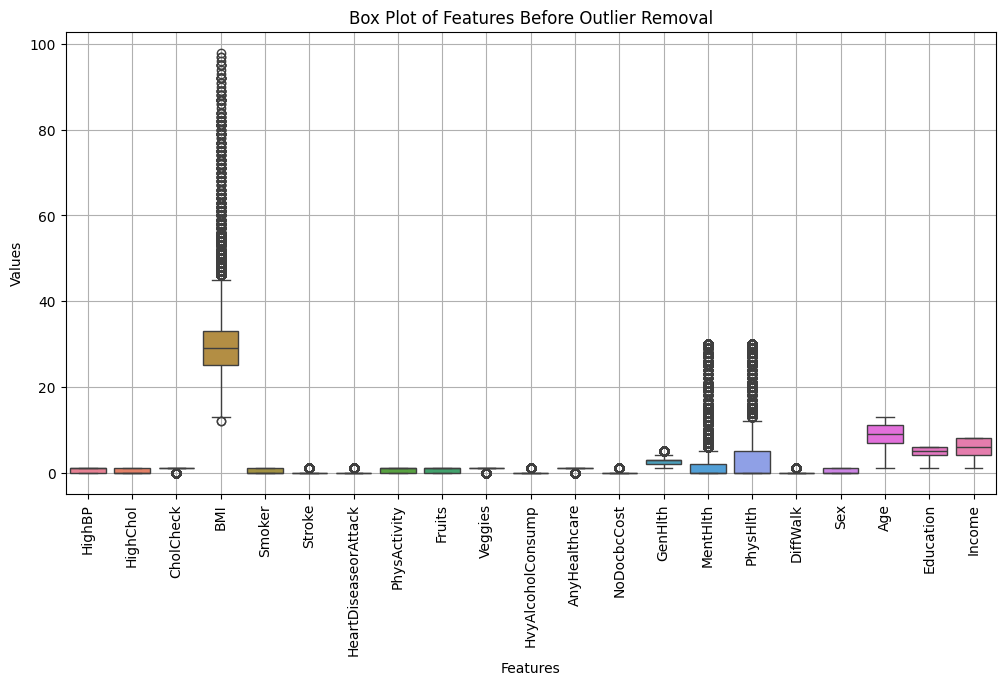

In [ ]:
# Convert X_train to DataFrame if it's not already
if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train)
else:
    X_train_df = X_train.copy()

# Create box plots for all features
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_df)
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.title("Box Plot of Features Before Outlier Removal")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)
plt.show()

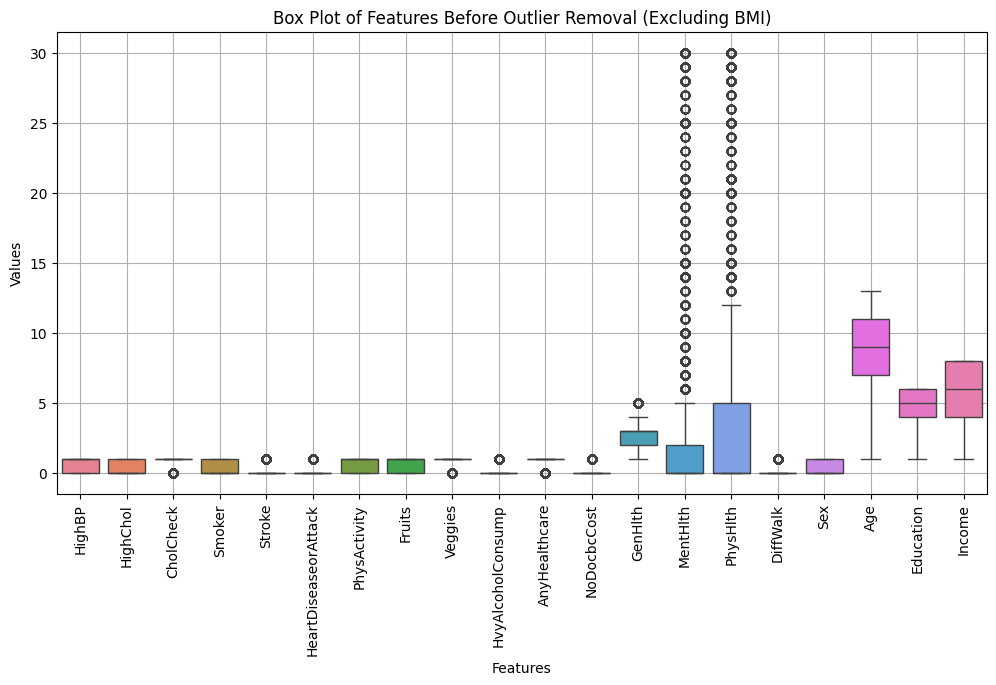

In [ ]:
# Convert X_train to DataFrame if it's not already
if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train)
else:
    X_train_df = X_train.copy()

# Drop the "BMI" column if it exists
if "BMI" in X_train_df.columns:
    X_train_df = X_train_df.drop(columns=["BMI"])

# Create box plots for all features except "BMI"
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_df)
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.title("Box Plot of Features Before Outlier Removal (Excluding BMI)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)
plt.show()


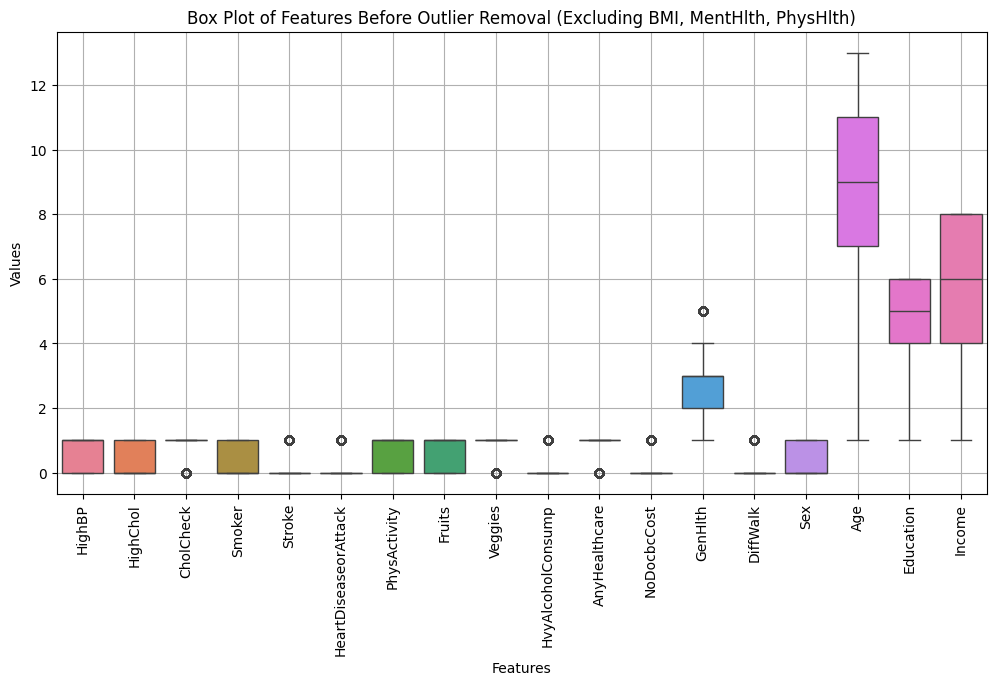

In [ ]:
# Convert X_train to DataFrame if it's not already
if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train)
else:
    X_train_df = X_train.copy()

# Drop the "BMI", "MentHlth", and "PhysHlth" columns if they exist
columns_to_exclude = ["BMI", "MentHlth", "PhysHlth"]
X_train_df = X_train_df.drop(columns=[col for col in columns_to_exclude if col in X_train_df.columns])

# Create box plots for all features except excluded columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_df)
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.title("Box Plot of Features Before Outlier Removal (Excluding BMI, MentHlth, PhysHlth)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)
plt.show()


##Outlier Handling - Removing Outliers

In [ ]:
# import numpy as np
# import pandas as pd
from scipy import stats

# Z-score method for outlier detection
z_scores = np.abs(stats.zscore(X_train))

# Set a threshold for outlier removal (common value: 3)
threshold = 3

# Identify rows where all feature Z-scores are less than the threshold
outlier_mask = (z_scores < threshold).all(axis=1)

# Filter out the rows in X and y
X_train_NoOutliers = X_train[outlier_mask]
y_train_NoOutliers = y_train[outlier_mask]

# Now X_cleaned and y_cleaned are the data with outliers removed


In [ ]:
X_train_NoOutliers.shape

(56632, 21)

In [ ]:
y_train_NoOutliers.shape

(56632,)

In [ ]:
X_train=X_train_NoOutliers

In [ ]:
y_train=y_train_NoOutliers

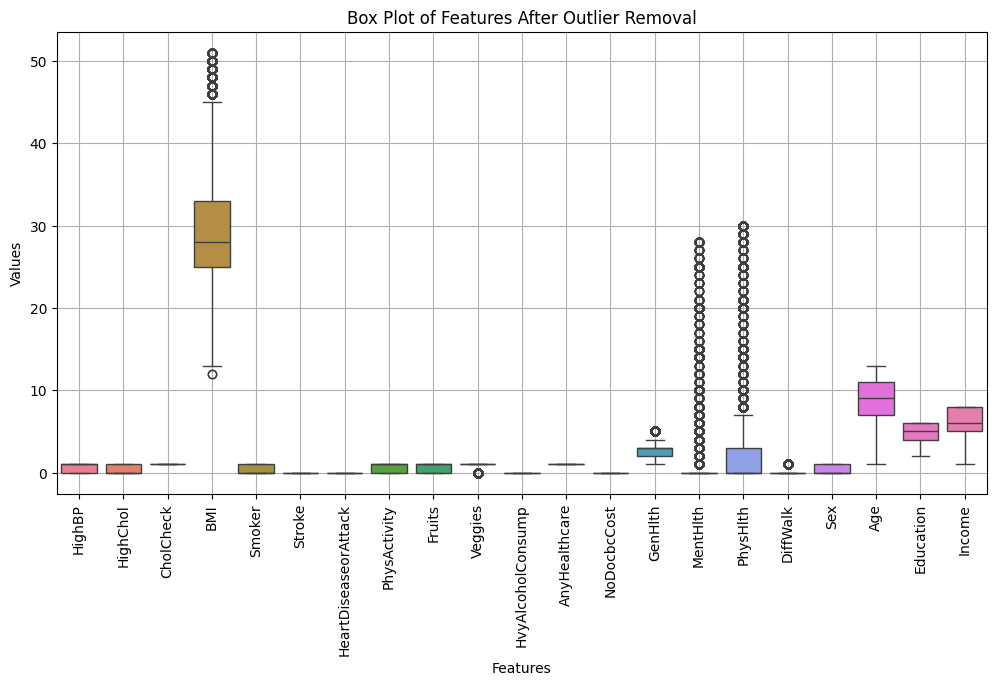

In [ ]:
# Convert X_train to DataFrame if it's not already
if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train)
else:
    X_train_df = X_train.copy()

# Create box plots for all features
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_df)
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.title("Box Plot of Features After Outlier Removal")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)
plt.show()

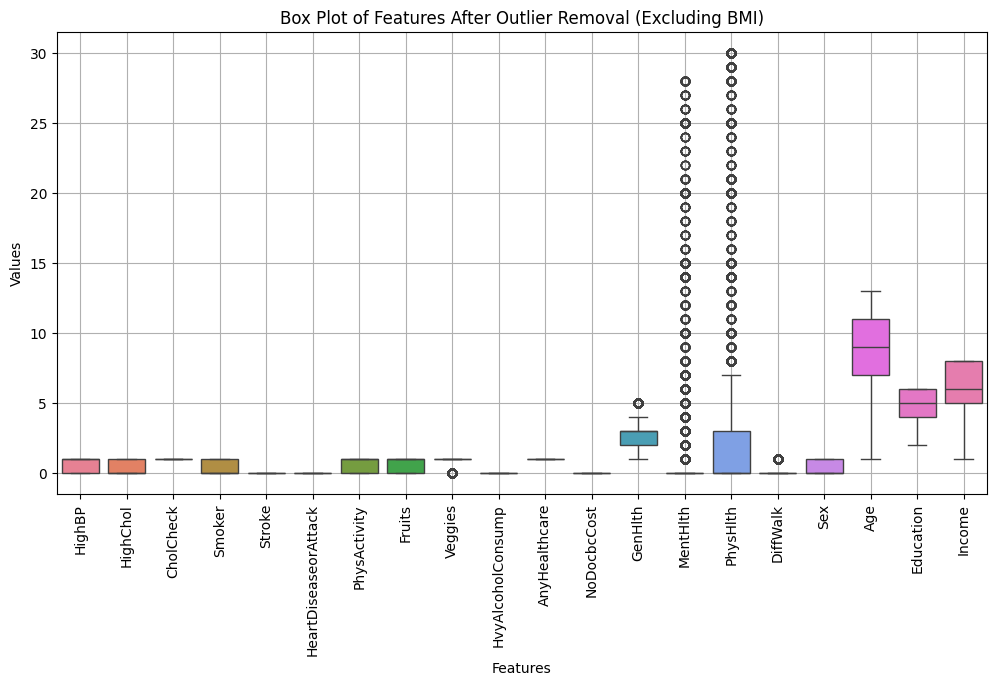

In [ ]:
# Convert X_train to DataFrame if it's not already
if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train)
else:
    X_train_df = X_train.copy()

# Drop the "BMI" column if it exists
if "BMI" in X_train_df.columns:
    X_train_df = X_train_df.drop(columns=["BMI"])

# Create box plots for all features except "BMI"
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_df)
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.title("Box Plot of Features After Outlier Removal (Excluding BMI)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)
plt.show()


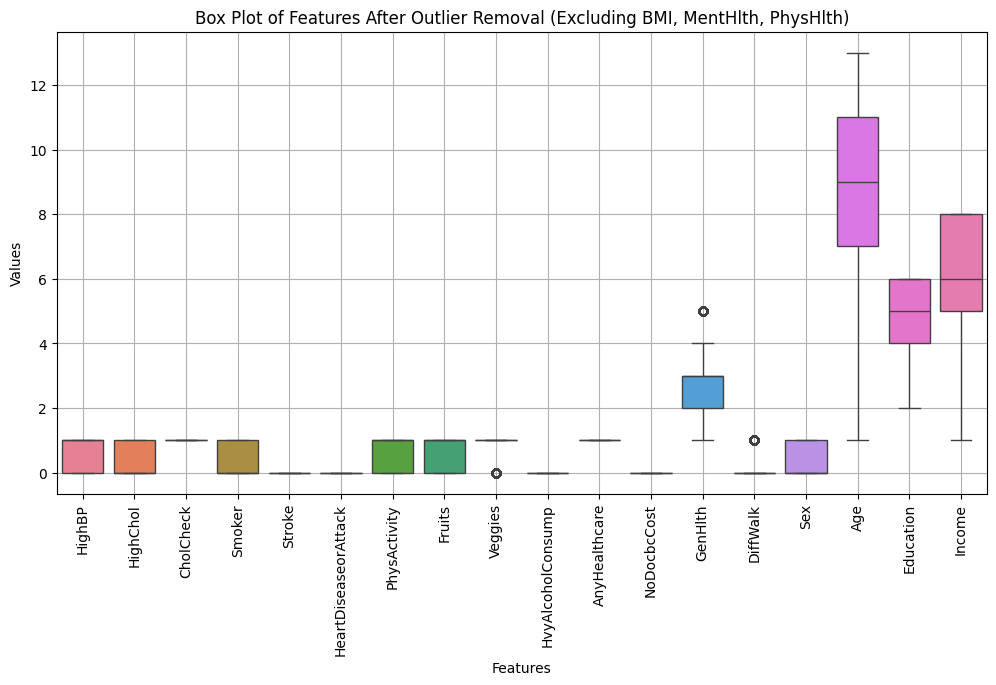

In [ ]:
# Convert X_train to DataFrame if it's not already
if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train)
else:
    X_train_df = X_train.copy()

# Drop the "BMI", "MentHlth", and "PhysHlth" columns if they exist
columns_to_exclude = ["BMI", "MentHlth", "PhysHlth"]
X_train_df = X_train_df.drop(columns=[col for col in columns_to_exclude if col in X_train_df.columns])

# Create box plots for all features except excluded columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train_df)
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.title("Box Plot of Features After Outlier Removal (Excluding BMI, MentHlth, PhysHlth)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.grid(True)
plt.show()


##Scaling

In [ ]:
display(X_train.head())
# display(y.iloc[:,0].unique())
# pd.DataFrame(X_train).head()
X_test.shape

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
188612       1         1          1   25       1       0   
182739       0         0          1   26       0       0   
365892       0         1          1   31       0       0   
431387       0         1          1   28       0       0   
203283       1         1          1   38       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
188612                     0             0       0        0  ...   
182739                     0             1       1        1  ...   
365892                     0             1       0        1  ...   
431387                     0             1       1        1  ...   
203283                     0             1       1        1  ...   

        AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  \
188612              1            0        2        15         0         0   
182739              1            0        2         0         0         0   
365892              1            0        3         0         5         0   
431387              1            0        3         0         0         0   
203283              1            0        3        10         0         0   

        Sex  Age  Education  Income  
188612    0   10          4       2  
182739    0   11          6       7  
365892    1    9          6       8  
431387    1   10          6       8  
203283    1    7          4       6  

[5 rows x 21 columns]

(20000, 21)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_validate,validation_curve,learning_curve,LearningCurveDisplay
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score
# from sklearn.metrics import f1_weighted_score
from sklearn.metrics import make_scorer
f1_weighted_score = make_scorer(f1_score, average='weighted')
import pprint
pp = pprint.PrettyPrinter(indent=4)

scaler = StandardScaler()
scaler.fit(X_train[Num_columns])


X_train[Num_columns] = scaler.transform(X_train[Num_columns])
X_test[Num_columns] = scaler.transform(X_test[Num_columns])

In [ ]:
display(X_train.head())
# display(y.iloc[:,0].unique())
# pd.DataFrame(X_train).head()
X_test.shape

HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
188612       1         1          1 -0.718849       1       0   
182739       0         0          1 -0.555093       0       0   
365892       0         1          1  0.263690       0       0   
431387       0         1          1 -0.227580       0       0   
203283       1         1          1  1.409985       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
188612                     0             0       0        0  ...   
182739                     0             1       1        1  ...   
365892                     0             1       0        1  ...   
431387                     0             1       1        1  ...   
203283                     0             1       1        1  ...   

        AnyHealthcare  NoDocbcCost   GenHlth  MentHlth  PhysHlth  DiffWalk  \
188612              1            0 -0.609103  3.075106 -0.499323         0   
182739              1            0 -0.609103 -0.394254 -0.499323         0   
365892              1            0  0.413448 -0.394254  0.073178         0   
431387              1            0  0.413448 -0.394254 -0.499323         0   
203283              1            0  0.413448  1.918652 -0.499323         0   

        Sex       Age  Education    Income  
188612    0  0.512027  -0.936207 -1.883766  
182739    0  0.871534   1.063238  0.520182  
365892    1  0.152520   1.063238  1.000972  
431387    1  0.512027   1.063238  1.000972  
203283    1 -0.566494  -0.936207  0.039392  

[5 rows x 21 columns]

(20000, 21)

In [ ]:
df_xy = pd.concat([X_train,y_train],axis=1)
data1=df_xy
data1_describe=data1.describe()
data1_describe
# data1_describe['Cholesterol'].mean()
# cholesterol_mmean = data1_describe.loc[data1_describe['Cholesterol'] == 'Mean', 'Cholesterol'].values[0]
# cholesterol_mean = data1_describe.loc['mean', 'Cholesterol']
# print("Mean cholesterol level:", cholesterol_mean)

HighBP      HighChol  CholCheck           BMI        Smoker  \
count  56632.000000  56632.000000    56632.0  5.663200e+04  56632.000000   
mean       0.511372      0.462318        1.0  2.248362e-16      0.376536   
std        0.499875      0.498582        0.0  1.000009e+00      0.484521   
min        0.000000      0.000000        1.0 -2.847683e+00      0.000000   
25%        0.000000      0.000000        1.0 -7.188490e-01      0.000000   
50%        1.000000      0.000000        1.0 -2.275796e-01      0.000000   
75%        1.000000      1.000000        1.0  5.912027e-01      1.000000   
max        1.000000      1.000000        1.0  3.538819e+00      1.000000   

        Stroke  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  56632.0               56632.0  56632.000000  56632.000000   
mean       0.0                   0.0      0.688215      0.580096   
std        0.0                   0.0      0.463227      0.493547   
min        0.0                   0.0      0.000000      0.000000   
25%        0.0                   0.0      0.000000      0.000000   
50%        0.0                   0.0      1.000000      1.000000   
75%        0.0                   0.0      1.000000      1.000000   
max        0.0                   0.0      1.000000      1.000000   

            Veggies  ...  NoDocbcCost       GenHlth      MentHlth  \
count  56632.000000  ...      56632.0  5.663200e+04  5.663200e+04   
mean       0.763808  ...          0.0 -3.688720e-17 -3.814186e-17   
std        0.424745  ...          0.0  1.000009e+00  1.000009e+00   
min        0.000000  ...          0.0 -1.631654e+00 -3.942544e-01   
25%        1.000000  ...          0.0 -6.091032e-01 -3.942544e-01   
50%        1.000000  ...          0.0  4.134477e-01 -3.942544e-01   
75%        1.000000  ...          0.0  4.134477e-01 -3.942544e-01   
max        1.000000  ...          0.0  2.458550e+00  6.081884e+00   

           PhysHlth      DiffWalk           Sex           Age     Education  \
count  5.663200e+04  56632.000000  56632.000000  5.663200e+04  5.663200e+04   
mean  -1.355040e-17      0.155071      0.397320 -2.094038e-16  1.706346e-16   
std    1.000009e+00      0.361976      0.489347  1.000009e+00  1.000009e+00   
min   -4.993232e-01      0.000000      0.000000 -2.723535e+00 -2.935653e+00   
25%   -4.993232e-01      0.000000      0.000000 -5.664937e-01 -9.362074e-01   
50%   -4.993232e-01      0.000000      0.000000  1.525200e-01  6.351537e-02   
75%   -1.558224e-01      0.000000      1.000000  8.715336e-01  1.063238e+00   
max    2.935685e+00      1.000000      1.000000  1.590547e+00  1.063238e+00   

             Income        target  
count  5.663200e+04  56632.000000  
mean  -1.425301e-16      0.506198  
std    1.000009e+00      0.499966  
min   -2.364556e+00      0.000000  
25%   -4.413974e-01      0.000000  
50%    3.939229e-02      1.000000  
75%    1.000972e+00      1.000000  
max    1.000972e+00      1.000000  

[8 rows x 22 columns]

In [ ]:
import matplotlib.pyplot as plt
 #for creating static, animated, and interactive visualizations in Python.
#Matplotlib makes easy things easy and hard things possible. Create publication quality plots.
#Make interactive figures that can zoom, pan, update

# import seaborn as sns
#data visualization library based on matplotlib. It provides a high-level interface for drawing
#attractive and informative statistical graphics.

# age_dist=sns.displot(data=data1,x="Status")
# data1.info()
################################################################################################


#DATA EXPLORATION CONTINUED
# correlation_matrix_data1 = data1.corr()
# print(correlation_matrix_data1)

import seaborn as sns
# plt.figure(figsize=(20,20))
# sns.heatmap(correlation_matrix_data1, annot=True, cmap='coolwarm')
# plt.show()
# sns.pairplot(data1)#, hue ='sex')  Taking a lot of time. So terminated.

#specify size of heatmap
# fig, ax = plt.subplots(figsize=(15, 5))

##Correlation

In [ ]:
### DATA EXPLORATION CONTINUED
correlation_matrix_data1 = data1.corr()
print(correlation_matrix_data1)

                        HighBP  HighChol  CholCheck       BMI    Smoker  \
HighBP                1.000000  0.258413        NaN  0.247387  0.037147   
HighChol              0.258413  1.000000        NaN  0.103314  0.058296   
CholCheck                  NaN       NaN        NaN       NaN       NaN   
BMI                   0.247387  0.103314        NaN  1.000000 -0.011571   
Smoker                0.037147  0.058296        NaN -0.011571  1.000000   
Stroke                     NaN       NaN        NaN       NaN       NaN   
HeartDiseaseorAttack       NaN       NaN        NaN       NaN       NaN   
PhysActivity         -0.142963 -0.076522        NaN -0.209101 -0.034814   
Fruits               -0.062096 -0.054614        NaN -0.139164 -0.046666   
Veggies              -0.079333 -0.036942        NaN -0.092334 -0.009906   
HvyAlcoholConsump          NaN       NaN        NaN       NaN       NaN   
AnyHealthcare              NaN       NaN        NaN       NaN       NaN   
NoDocbcCost              

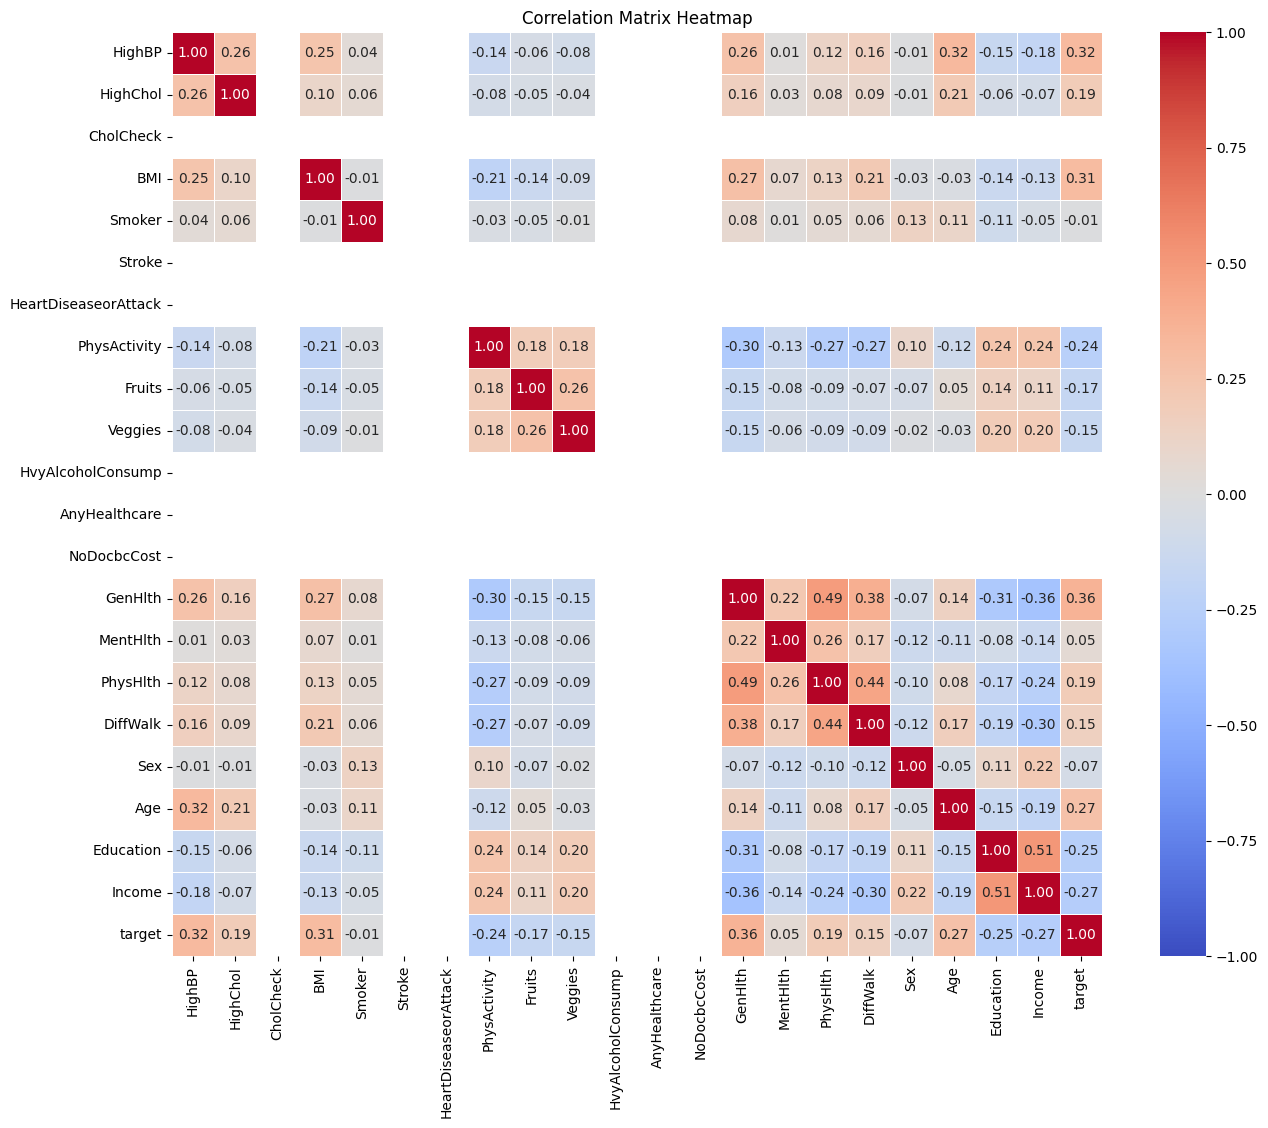

In [ ]:
# Generate the heatmap
plt.figure(figsize=(15, 12))  # You can adjust the size as needed
sns.heatmap(correlation_matrix_data1, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

## Bar Charts

In [ ]:
df_x=X_train
df_y=y_train

In [ ]:
# y.shape
# y.columns
y.value_counts(normalize=True)


target
0    0.5004
1    0.4996
Name: proportion, dtype: float64

In [ ]:
y_train.value_counts(normalize=True)

target
1    0.506198
0    0.493802
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

target
0    0.5004
1    0.4996
Name: proportion, dtype: float64

In [ ]:
np.unique(y_train)

array([0, 1])

In [ ]:
# def plot_bar_chart(X,Y1,Y2,y1_label=None,y2_label=None,xax_label="Param value",yax_label="score",**kwargs):

#   Y1 = list(np.mean(train_scores,axis=1))
#   Y2 = list(np.mean(valid_scores,axis=1))

#   Y = np.hstack([Y1,Y2]).reshape(-1,len(X))
#   X_axis = np.arange(len(X))
#   plt.bar(X_axis - 0.2, list(Y[0]), 0.4, label = y1_label)
#   plt.bar(X_axis + 0.2, list(Y[1]), 0.4, label = y2_label)

#   title_text = "Validation Curve: Dataset2"
#   for key,value in kwargs.items():
#     title_text = title_text+f"{key}-{value} "

#   plt.xticks(X_axis, X)
#   plt.xlabel(xax_label)
#   plt.ylabel(yax_label)
#   plt.title(title_text)
#   plt.legend()
#   plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
X_train.shape

(56632, 21)

In [ ]:
X_test.shape

(20000, 21)

In [ ]:
y_train.shape

(56632,)

In [ ]:
y_test.shape

(20000,)

In [ ]:
y_test.shape

(20000,)

In [ ]:
# Install Libraries & Import



##Clustering

###K Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances

In [ ]:
def k_means_clustering(X_train, num_clusters,random_state=42):
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    kmeans.fit(X_train)
    return kmeans

def calculate_inter_intra_distances(X_train, kmeans_model):
    inter_cluster_distances = pairwise_distances(kmeans_model.cluster_centers_)
    intra_cluster_distances = kmeans_model.inertia_
    return np.mean(inter_cluster_distances), intra_cluster_distances

def calculate_silhouette_score(X_train, kmeans_model):
    silhouette = silhouette_score(X_train, kmeans_model.labels_)
    return silhouette

def generate_plots(cluster_range, inter_distances, intra_distances, silhouette_scores):
    plt.figure(figsize=(12, 6))

    # Plot Inter Cluster Distance
    plt.subplot(2,2, 1)
    plt.plot(cluster_range, inter_distances, marker='o', linestyle='-', label='Inter-cluster Distance')
    # plt.plot(cluster_range, intra_distances, marker='o', linestyle='-', label='Intra-cluster Distance')
    plt.title('Inter Cluster Distance vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distance')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.legend()

    # Plot Intra Cluster Distance
    plt.subplot(2,2, 2)
    # plt.plot(cluster_range, inter_distances, marker='o', linestyle='-', label='Inter-cluster Distance')
    plt.plot(cluster_range, intra_distances, marker='o', linestyle='-', label='Intra-cluster Distance')
    plt.title('Intra Cluster Distance vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distance')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.legend()

    # Plot Silhouette Score
    plt.subplot(2,2, 3)
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(cluster_range)
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def generate_table(cluster_range, inter_distances, intra_distances,silhouette_scores):
    table_data = {'Number of Clusters': cluster_range, 'Inter-cluster Distance': inter_distances, 'Intra-cluster Distance': intra_distances,'SilhouetteScore': silhouette_scores}
    table = pd.DataFrame(table_data)
    print("Inter vs. Intra Cluster Distance Table:")
    print(table)

In [ ]:
# ## Delete later
# ## Sampling down to 10k rows just to test the code below


# # Combine X_train and y_train into a single DataFrame for easier sampling
# df_smote = pd.DataFrame(X_train)
# df_smote['target'] = y_train

# # Check the class distribution in the SMOTE data
# class_distribution = df_smote['target'].value_counts(normalize=True)
# print(f"Class distribution before sampling:\n{class_distribution}")

# # Sample 100,000 rows while maintaining the class balance
# df_smote_sampled = df_smote.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=1.0, random_state=42)).sample(n=10000, random_state=42)

# # Check the class distribution of the sampled data
# sampled_class_distribution = df_smote_sampled['target'].value_counts(normalize=True)
# print(f"Class distribution after sampling 10,000 rows:\n{sampled_class_distribution}")

# # Separate the features and target after sampling
# X_sampled = df_smote_sampled.drop(columns='target')
# y_sampled = df_smote_sampled['target']

In [ ]:
# X_train_10k=X_sampled
# y_train_10k=y_sampled

In [ ]:
X_train.shape

(56632, 21)

In [ ]:
y_train.shape

(56632,)

In [ ]:
# print(type(X_train_10k), type(y_train_10k))
print(type(X_train_10k))
print(type(y_train_10k))


NameError: name 'X_train_10k' is not defined

In [ ]:
pd.DataFrame(X_train_10k).shape

NameError: name 'X_train_10k' is not defined

In [ ]:
pd.DataFrame(y_train_10k).shape

NameError: name 'y_train_10k' is not defined

In [ ]:
# print(type(X_train_10k), type(y_train_10k))
print(type(X_train_10k))
print(type(y_train_10k))


NameError: name 'X_train_10k' is not defined

In [ ]:
cluster_range = range(2,11)  # Range of clusters to try
inter_distances_kMbase_list=[]
intra_distances_kMbase_list=[]
silhouette_scores_kMbase=[]

# Dictionary to store cluster labels for different numbers of clusters
cluster_labels_dict = {}

for num_clusters in cluster_range:
    # Train K-means model
    kmeans_model_base = k_means_clustering(X_train, num_clusters)

    # Calculate inter and intra cluster distances
    inter_distance_kMbase, intra_distance_kMbase = calculate_inter_intra_distances(X_train, kmeans_model_base)
    inter_distances_kMbase_list.append(inter_distance_kMbase)
    intra_distances_kMbase_list.append(intra_distance_kMbase)

    # Calculate silhouette score
    silhouette_kMbase = calculate_silhouette_score(X_train, kmeans_model_base)
    silhouette_scores_kMbase.append(silhouette_kMbase)

    # Store cluster labels in the dictionary
    cluster_labels_dict[num_clusters] = kmeans_model_base.labels_

    # Print distances for each cluster
    print(f"Number of clusters: {num_clusters}")
    print("Inter-cluster Distance:", inter_distance_kMbase)
    print("Intra-cluster Distance:", intra_distance_kMbase)
    print("Silhouette Score:", silhouette_kMbase)
    print()

Number of clusters: 2
Inter-cluster Distance: 1.3257387861679308
Intra-cluster Distance: 403363.9925089514
Silhouette Score: 0.2088639551719987

Number of clusters: 3
Inter-cluster Distance: 2.0465668518124507
Intra-cluster Distance: 357515.0620003829
Silhouette Score: 0.1625491142096323

Number of clusters: 4
Inter-cluster Distance: 2.487988160532792
Intra-cluster Distance: 336094.63746814564
Silhouette Score: 0.11684199493923324

Number of clusters: 5
Inter-cluster Distance: 2.7775499672872774
Intra-cluster Distance: 303793.686092684
Silhouette Score: 0.13087585180819516

Number of clusters: 6
Inter-cluster Distance: 2.8347494480629423
Intra-cluster Distance: 283788.9082109356
Silhouette Score: 0.1323644082044628

Number of clusters: 7
Inter-cluster Distance: 2.842185331969675
Intra-cluster Distance: 273508.9809251838
Silhouette Score: 0.1177264088049564

Number of clusters: 8
Inter-cluster Distance: 2.8248176525312667
Intra-cluster Distance: 265093.4033789131
Silhouette Score: 0.109

In [ ]:
# Find the number of clusters with the highest silhouette score
best_cluster_index = np.argmax(silhouette_scores_kMbase)  # Get index of max silhouette score
best_num_clusters = cluster_range[best_cluster_index]  # Get corresponding cluster number
best_cluster_labels = cluster_labels_dict[best_num_clusters]  # Get labels for best cluster

print(f"Best number of clusters: {best_num_clusters}")
print(f"Highest Silhouette Score: {silhouette_scores_kMbase[best_cluster_index]}")
print("Cluster labels for best number of clusters:", best_cluster_labels)


Best number of clusters: 2
Highest Silhouette Score: 0.2088639551719987
Cluster labels for best number of clusters: [0 1 1 ... 1 0 1]


In [ ]:
# # Check out the Labels from the Final KMeans Model
# cluster_labels = kmeans_model_base.labels_
cluster_labels =best_cluster_labels
# cluster_labels
print("Cluster labels for",best_num_clusters, "clusters:", cluster_labels)

Cluster labels for 2 clusters: [0 1 1 ... 1 0 1]


In [ ]:
# # Retrieve cluster labels for // clusters
# cluster_labels = cluster_labels_dict[//]  # Change // to any cluster number in range
# print("Cluster labels for // clusters:", cluster_labels)

In [ ]:
best_num_clusters

2

#### (KMeans) Visualize best cluster

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


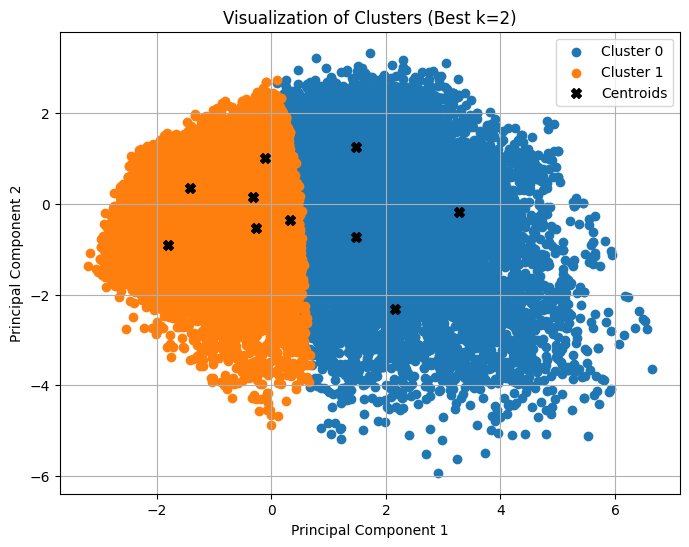

In [ ]:
from sklearn.decomposition import PCA

# Function to visualize clusters
def visualize_clusters(X_train, cluster_labels, num_clusters):
    pca = PCA(n_components=2)  # Reduce data to 2D for visualization
    X_pca = pca.fit_transform(X_train)

    plt.figure(figsize=(8, 6))
    for i in range(num_clusters):
        plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i}')

    plt.scatter(pca.transform(kmeans_model_base.cluster_centers_)[:, 0],
                pca.transform(kmeans_model_base.cluster_centers_)[:, 1],
                color='black', marker='X', s=50, label='Centroids')

    plt.title(f'Visualization of Clusters (Best k={num_clusters})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to visualize
visualize_clusters(X_train, np.array(cluster_labels), best_num_clusters)

#
#
#
#
# # Function to visualize clusters
# def visualize_clusters(X_train, cluster_labels, num_clusters, kmeans_model):
#     plt.figure(figsize=(8, 6))

#     for i in range(num_clusters):
#         plt.scatter(X_train[cluster_labels == i, 0], X_train[cluster_labels == i, 1], label=f'Cluster {i}')

#     # Plot centroids
#     plt.scatter(kmeans_model.cluster_centers_[:, 0],
#                 kmeans_model.cluster_centers_[:, 1],
#                 color='black', marker='X', s=200, label='Centroids')

#     plt.title(f'Visualization of Clusters (Best k={num_clusters})')
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Call the function to visualize
# visualize_clusters(X_train, np.array(cluster_labels), best_num_clusters, kmeans_model_base)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D

# def visualize_clusters_3D(X_train, cluster_labels, num_clusters):
#     pca = PCA(n_components=3)  # Reduce data to 3D for visualization
#     X_pca = pca.fit_transform(X_train)

#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection='3d')

#     for i in range(num_clusters):
#         ax.scatter(X_pca[cluster_labels == i, 0],
#                    X_pca[cluster_labels == i, 1],
#                    X_pca[cluster_labels == i, 2],
#                    label=f'Cluster {i}')

#     ax.set_title(f'3D Visualization of Clusters (Best k={num_clusters})')
#     ax.set_xlabel('Principal Component 1')
#     ax.set_ylabel('Principal Component 2')
#     ax.set_zlabel('Principal Component 3')
#     ax.legend()
#     plt.show()

# # Call the function to visualize
# visualize_clusters_3D(X_train, np.array(cluster_labels), best_num_clusters)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


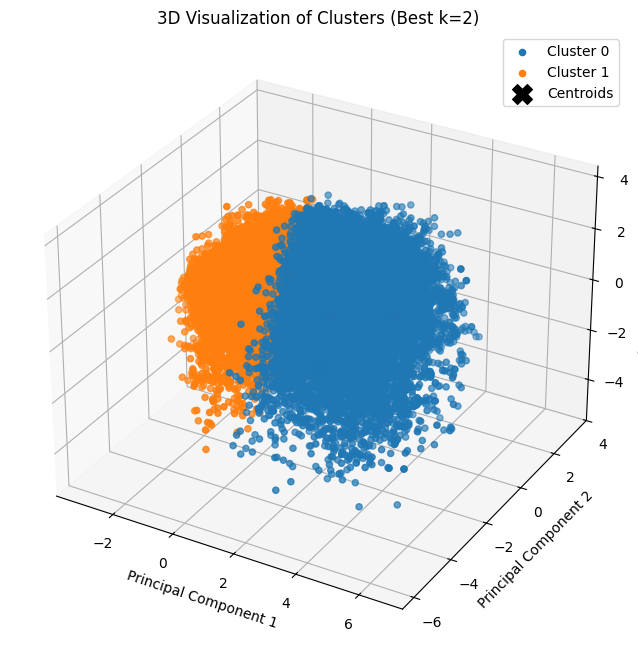

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def visualize_clusters_3D(X_train, cluster_labels, num_clusters, kmeans_model):
    pca = PCA(n_components=3)  # Reduce data to 3D for visualization
    X_pca = pca.fit_transform(X_train)
    centroids_pca = pca.transform(kmeans_model.cluster_centers_)  # Transform centroids to 3D

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot cluster points
    for i in range(num_clusters):
        ax.scatter(X_pca[cluster_labels == i, 0],
                   X_pca[cluster_labels == i, 1],
                   X_pca[cluster_labels == i, 2],
                   label=f'Cluster {i}')

    # Plot centroids
    ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2],
               color='black', marker='X', s=200, label='Centroids')

    ax.set_title(f'3D Visualization of Clusters (Best k={num_clusters})')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.legend()
    plt.show()

# Call the function to visualize
visualize_clusters_3D(X_train, np.array(cluster_labels), best_num_clusters, kmeans_model_base)


####(KMeans) Compare with ground truth labels

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [ ]:
# print(y_train.shape)
# # y_train

In [ ]:
if not isinstance(y_train, np.ndarray):
    y_train_2 = y_train.values.ravel()

In [ ]:
# Compare cluster output labels with ground truth labels

# Calculate ARI and NMI using ground truth labels and K-means cluster labels
ari = adjusted_rand_score(y_train_2, cluster_labels)
nmi = normalized_mutual_info_score(y_train_2, cluster_labels)

# Print ARI and NMI scores
print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.1107172867217824
Normalized Mutual Information: 0.09416402446552972


##Logistic Regression, Propensity Score, Causal Analysis

In [ ]:
kmeans_model_base.score

<bound method _BaseKMeans.score of KMeans(n_clusters=10, random_state=42)>

In [ ]:
cluster_labels

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
y_train

188612    0
182739    0
365892    1
431387    1
203283    0
         ..
354465    1
354140    1
91718     0
323327    1
167215    0
Name: target, Length: 56632, dtype: int64

In [ ]:
y_clusters = pd.DataFrame(cluster_labels)
y_clusters

0
0      0
1      1
2      1
3      1
4      0
...   ..
56627  0
56628  0
56629  1
56630  0
56631  1

[56632 rows x 1 columns]

###Logistic Regression

In [ ]:
# Can use classification algorithm such as Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)



LogisticRegression()

In [ ]:
y_clusters

0
0      0
1      1
2      1
3      1
4      0
...   ..
56627  0
56628  0
56629  1
56630  0
56631  1

[56632 rows x 1 columns]

In [ ]:
# prediction_probabilities_original = lr.predict_proba(X_test)
# prediction_probabilities_original

In [ ]:
# prediction_probabilities_original_df = pd.DataFrame({'prediction_probabilities_original': prediction_probabilities_original})
# prediction_probabilities_original_df

In [ ]:
# type(prediction_probabilities_original)

In [ ]:
# prediction_series = prediction_probabilities_original.reshape(-1)

In [ ]:
# propensity_df = pd.DataFrame({'propensity_score_original': prediction_series})
# propensity_df

In [ ]:
# This gives the true propensity scores
propensity_scores = lr.predict_proba(X_test)[:, 1]
propensity_score_df = pd.DataFrame({'propensity_score': propensity_scores})
propensity_score_df


propensity_score
0              0.879915
1              0.392266
2              0.066964
3              0.914322
4              0.326989
...                 ...
19995          0.128899
19996          0.110153
19997          0.582651
19998          0.297624
19999          0.424077

[20000 rows x 1 columns]

In [ ]:
# # Step 1: Apply threshold to convert propensity scores to predicted labels
# threshold = 0.5
# predicted_labels = (propensity_score_df['propensity_score'] >= threshold).astype(int)

# # Step 2: Compare with ground truth
# true_labels = df_xy['Cluster_Labels']

# # Step 3: Evaluate performance
# print("Confusion Matrix:")
# print(confusion_matrix(true_labels, predicted_labels))

# print("\nClassification Report:")
# print(classification_report(true_labels, predicted_labels, target_names=['Non-Diabetic', 'Diabetic']))

Confusion Matrix:


ValueError: Found input variables with inconsistent numbers of samples: [56526, 20000]

In [ ]:
import pandas as pd

# Step 1: Get propensity scores (probability of class 1)
propensity_scores = lr.predict_proba(X_test)[:, 1]

# Step 2: Set your decision threshold
threshold = 0.5
predicted_labels = (propensity_scores >= threshold).astype(int)

# Step 3: Create DataFrame with scores and predictions
df_predictions = pd.DataFrame({
    'propensity_score': propensity_scores,
    'predicted_label': predicted_labels
})

# Step 4 (Optional): Add true labels to compare
df_predictions['true_label'] = y_test.values  # if y_test is a Series or NumPy array

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[6849 3159]
 [2226 7766]]


In [ ]:
# Get the classification report
report = classification_report(y_test, predicted_labels)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.72     10008
           1       0.71      0.78      0.74      9992

    accuracy                           0.73     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.73      0.73      0.73     20000



In [ ]:
# Calculate ROC AUC score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, propensity_scores)

print("ROC AUC Score:")
print(roc_auc)


ROC AUC Score:
0.8022477734385751


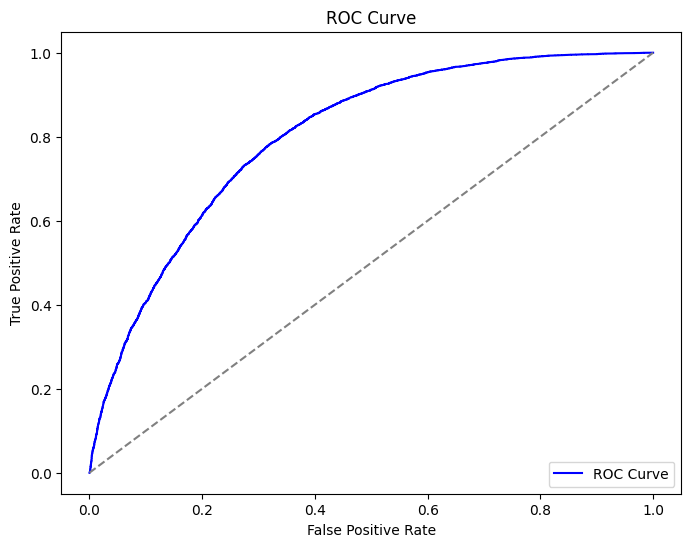

In [ ]:
# Get the False Positive Rate and True Positive Rate
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, propensity_scores)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

##DBSCAN

Silhouette Score (DBSCAN): -0.3889906665528895


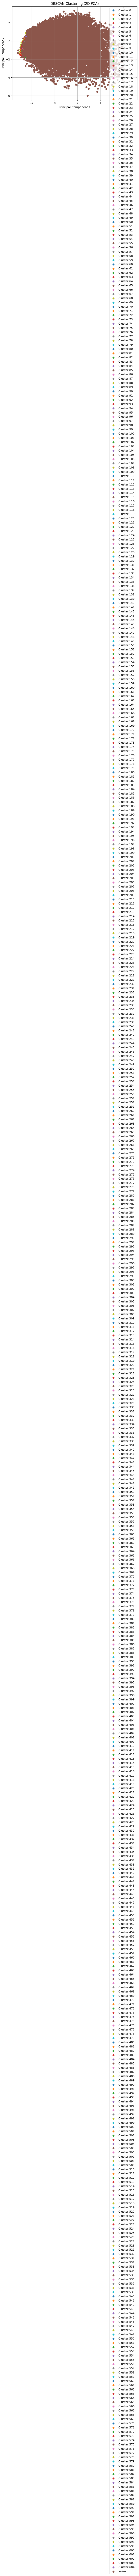

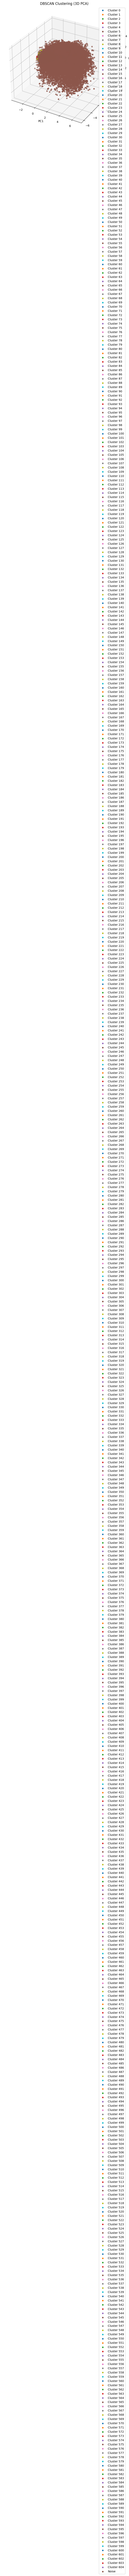

Adjusted Rand Index (DBSCAN): 0.01026556736869472
Normalized Mutual Information (DBSCAN): 0.05141171594686566
DBSCAN Cluster Labels: [-1  0 -1 ... -1 -1 -1]


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Function to perform DBSCAN clustering
def dbscan_clustering(X_train, eps=0.5, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X_train)
    return db

# Function to calculate silhouette score (excluding noise points)
def calculate_silhouette_score_dbscan(X_train, labels):
    if len(set(labels)) > 1 and len(set(labels)) != 1 + (1 if -1 in labels else 0):
        return silhouette_score(X_train, labels)
    else:
        return -1  # Invalid silhouette score when there's 1 or fewer clusters

# Function to visualize clusters in 2D
def visualize_clusters_2D_dbscan(X_train, cluster_labels):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train)
    unique_labels = set(cluster_labels)
    plt.figure(figsize=(8, 6))
    for label in unique_labels:
        label_mask = cluster_labels == label
        plt.scatter(X_pca[label_mask, 0], X_pca[label_mask, 1], label=f'Cluster {label}' if label != -1 else 'Noise')
    plt.title('DBSCAN Clustering (2D PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to visualize clusters in 3D
def visualize_clusters_3D_dbscan(X_train, cluster_labels):
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_train)
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    unique_labels = set(cluster_labels)
    for label in unique_labels:
        label_mask = cluster_labels == label
        ax.scatter(X_pca[label_mask, 0], X_pca[label_mask, 1], X_pca[label_mask, 2], label=f'Cluster {label}' if label != -1 else 'Noise')
    ax.set_title('DBSCAN Clustering (3D PCA)')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.legend()
    plt.show()

# Run DBSCAN with example parameters
dbscan_model = dbscan_clustering(X_train, eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.labels_

# Calculate silhouette score
silhouette_dbscan = calculate_silhouette_score_dbscan(X_train, dbscan_labels)
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")

# Visualize
visualize_clusters_2D_dbscan(X_train, dbscan_labels)
visualize_clusters_3D_dbscan(X_train, dbscan_labels)

# Compare with ground truth
if not isinstance(y_train, np.ndarray):
    y_train_2 = y_train.values.ravel()

ari_dbscan = adjusted_rand_score(y_train_2, dbscan_labels)
nmi_dbscan = normalized_mutual_info_score(y_train_2, dbscan_labels)

print("Adjusted Rand Index (DBSCAN):", ari_dbscan)
print("Normalized Mutual Information (DBSCAN):", nmi_dbscan)

# Cluster label output
print("DBSCAN Cluster Labels:", dbscan_labels)


##Identifying high risk factors

https://medium.com/@zainab.mehmood/exploratory-data-analysis-of-diabetes-health-indicators-39a0d5c4aa1a

In [ ]:
import statsmodels.api as sm

In [ ]:
#A

In [ ]:
print(df_xy.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'target'],
      dtype='object')


In [ ]:


# Define independent variables and target
U = df_xy[['Age', 'BMI', 'PhysActivity', 'HighBP', 'HighChol']]
v = df_xy['target']

# Add constant to the model
U = sm.add_constant(U)

# Fit logistic regression model
model = sm.Logit(v, U).fit()

# Display model summary
print(model.summary())

# print(U)


Optimization terminated successfully.
         Current function value: 0.569785
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                56526
Model:                          Logit   Df Residuals:                    56520
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.1779
Time:                        14:19:03   Log-Likelihood:                -32208.
converged:                       True   LL-Null:                       -39177.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0363      0.022      1.656      0.098      -0.007       0.079
Age              0.5012

In [ ]:
#

##Resilient Individuals

In [ ]:
# # import pandas as pd
# # import matplotlib.pyplot as plt
# # import seaborn as sns

# # # Load the dataset
# # df = pd.read_csv('diabetes_health_indicators.csv')

# # Filter for non-diabetic individuals
# non_diabetic_df = df_xy[df_xy['target'] == 0]

# # Bar chart for physical activity
# sns.countplot(x='PhysActivity', data=non_diabetic_df)
# plt.title('Physical Activity Distribution Among Non-Diabetic Individuals')
# plt.xlabel('Physical Activity (0: No, 1: Yes)')
# plt.ylabel('Count')
# plt.show()

# # Correlation heatmap
# correlation_matrix = non_diabetic_df[['Age', 'BMI', 'HighBP', 'HighChol']].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix for Non-Diabetic Individuals')
# plt.show()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the dataset
# # df = pd.read_csv('diabetes_health_indicators.csv')

# # Filter for non-diabetic individuals
# non_diabetic_df = df_xy[df_xy['target'] == 0]

# # Identify numerical and categorical columns
# numerical_features = non_diabetic_df.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = non_diabetic_df.select_dtypes(include=['object', 'category', 'bool']).columns

# # Exclude target variable if it's numerical
# if 'target' in numerical_features:
#     numerical_features = numerical_features.drop('target')

# # 1. Bar charts for categorical variables
# for feature in categorical_features:
#     plt.figure(figsize=(6, 4))
#     sns.countplot(x=feature, data=non_diabetic_df)
#     plt.title(f'Distribution of {feature} Among Non-Diabetic Individuals')
#     plt.xlabel(feature)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.show()

# # 2. Histograms for numerical variables
# for feature in numerical_features:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(non_diabetic_df[feature], bins=20, kde=True)
#     plt.title(f'Distribution of {feature} Among Non-Diabetic Individuals')
#     plt.xlabel(feature)
#     plt.ylabel('Count')
#     plt.show()

# # 3. Correlation heatmap for numerical features
# plt.figure(figsize=(10, 8))
# correlation_matrix = non_diabetic_df[numerical_features].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Matrix for Non-Diabetic Individuals')
# plt.show()


###No diabetes individuals

In [ ]:
# # Filter for non-diabetic individuals
# non_diabetic_df = df_xy[df_xy['target'] == 0]

# # Identify binary (0/1) features

# binary_features = [col for col in non_diabetic_df.columns if non_diabetic_df[col].nunique() == 2]
# binary_features

In [ ]:
# non_diabetic_df.head()

<ipython-input-112-8bc468619d69>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


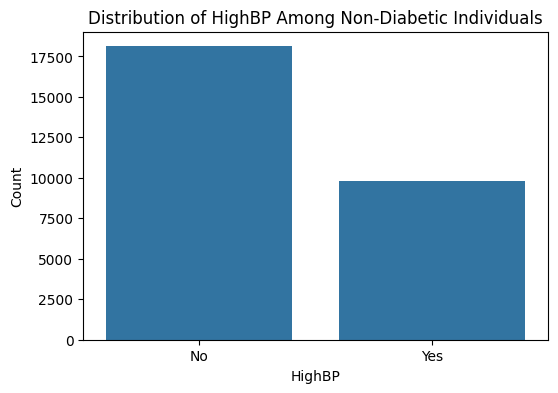

<ipython-input-112-8bc468619d69>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


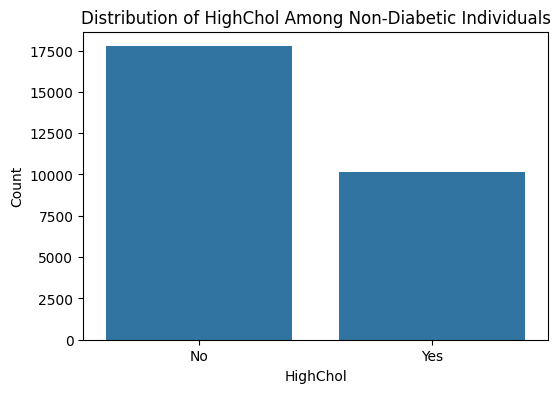

<ipython-input-112-8bc468619d69>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


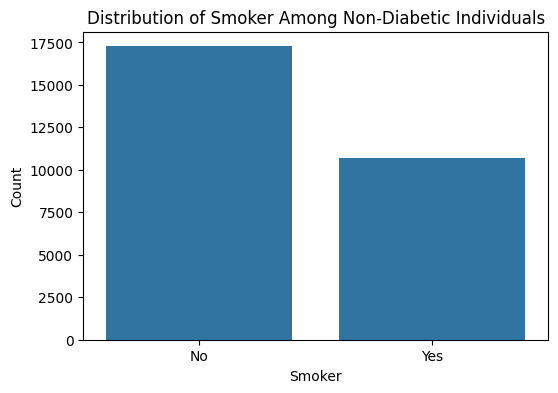

<ipython-input-112-8bc468619d69>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


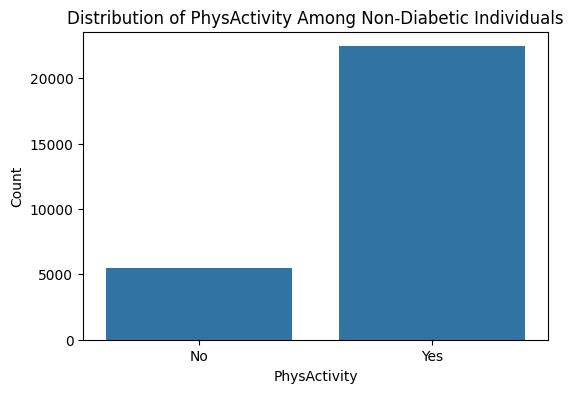

<ipython-input-112-8bc468619d69>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


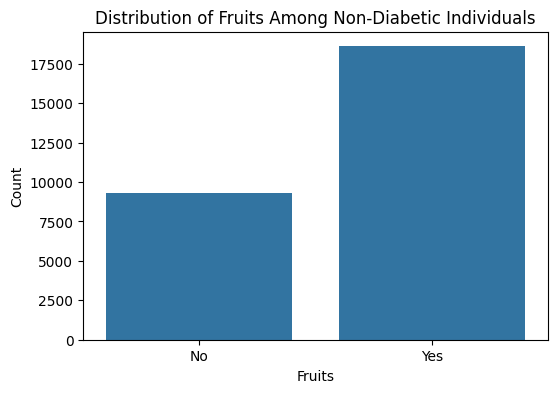

<ipython-input-112-8bc468619d69>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


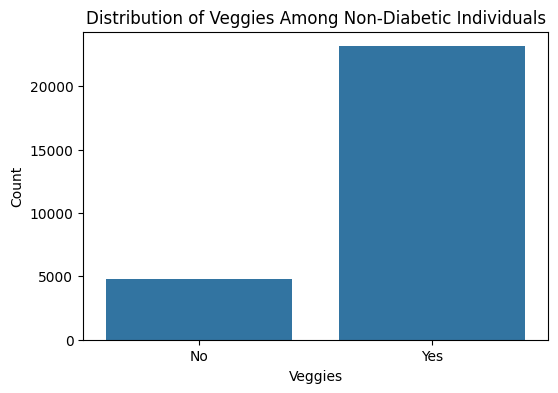

<ipython-input-112-8bc468619d69>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


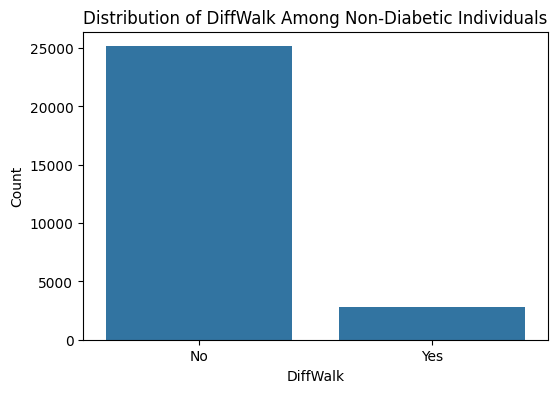

<ipython-input-112-8bc468619d69>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0 (Female)', '1 (Male)'])


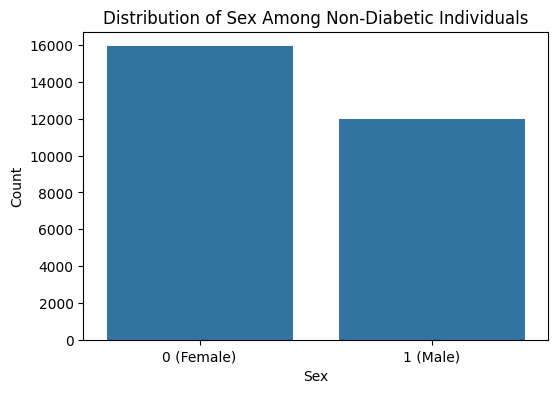

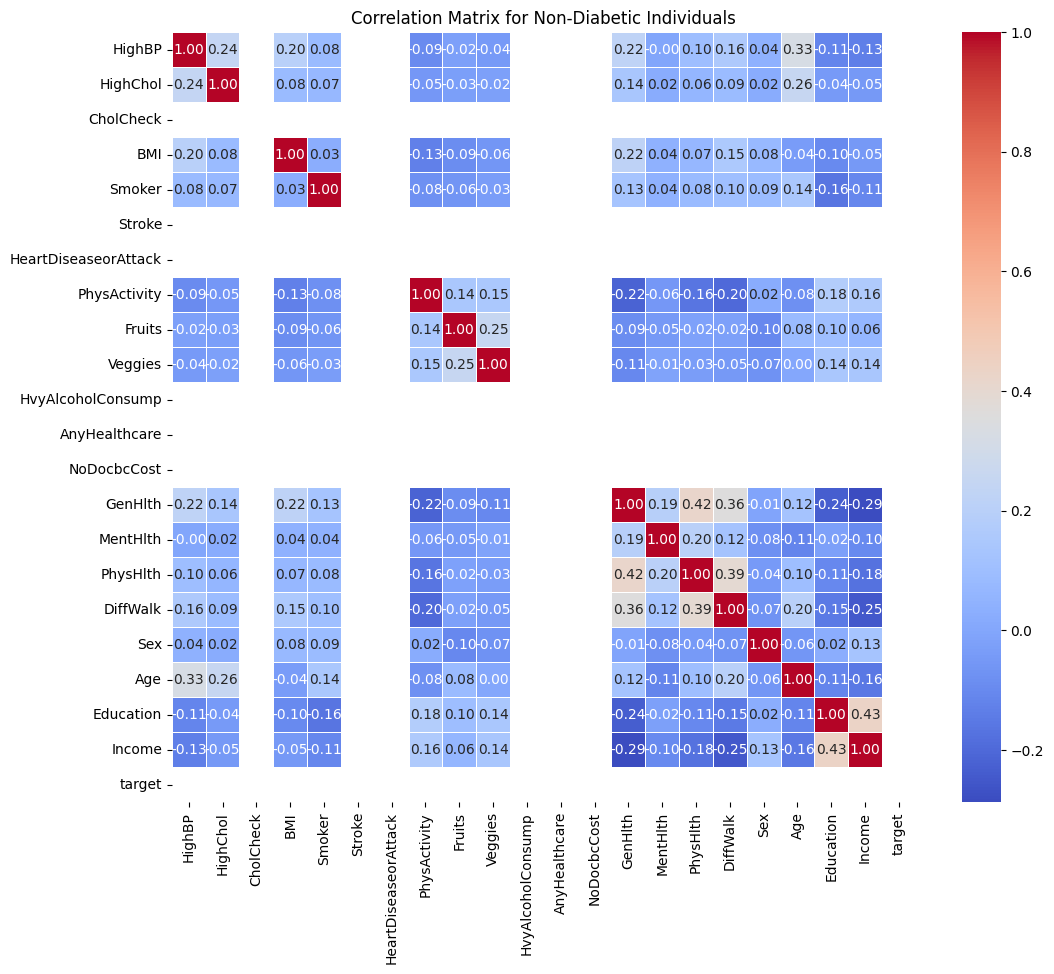

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv('diabetes_health_indicators.csv')

# Filter for non-diabetic individuals
non_diabetic_df = df_xy[df_xy['target'] == 0]

# Identify binary (0/1) features
binary_features = [col for col in non_diabetic_df.columns if non_diabetic_df[col].nunique() == 2]
binary_features

# 1. Bar charts for binary features
for feature in binary_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=feature, data=non_diabetic_df)
    plt.title(f'Distribution of {feature} Among Non-Diabetic Individuals')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Special handling for 'Sex' feature
    if feature == 'Sex':
        ax.set_xticklabels(['0 (Female)', '1 (Male)'])
    else:
        ax.set_xticklabels(['No', 'Yes'])

    plt.show()

# 2. Correlation heatmap for all features
plt.figure(figsize=(12, 10))
correlation_matrix = non_diabetic_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Non-Diabetic Individuals')
plt.show()


In [ ]:
#A

###Analyzing Resilient Individuals

In [ ]:
# # Define high-risk criteria
# high_risk_non_diabetic = df_xy[
#     (df_xy['Age'] > 60) &
#     (df_xy['BMI'] > 30) &
#     (df_xy['PhysActivity'] == 0) &
#     (df_xy['target'] == 0)
# ]

# # Analyze the high-risk non-diabetic group
# print(high_risk_non_diabetic.describe())

####Filter for Resilient Non-Diabetic Individuals

In [ ]:
df_xy.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'target'],
      dtype='object')

In [ ]:
df_xy.head()

HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
188612       1         1          1 -0.719024       1       0   
182739       0         0          1 -0.554864       0       0   
365892       1         1          1  2.728351       0       0   
203283       1         1          1  1.415065       1       0   
394216       1         0          1 -0.390703       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
188612                     0             0       0        0  ...            0   
182739                     0             1       1        1  ...            0   
365892                     0             0       0        1  ...            0   
203283                     0             1       1        1  ...            0   
394216                     0             1       0        0  ...            0   

         GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  Education  \
188612 -0.607313  3.147779 -0.497771         0    0  0.509304  -0.924695   
182739 -0.607313 -0.398290 -0.497771         0    0  0.867879   1.065077   
365892  0.417402 -0.398290 -0.497771         0    0  0.867879  -0.924695   
203283  0.417402  1.965756 -0.497771         0    1 -0.566421  -0.924695   
394216  0.417402 -0.398290 -0.497771         0    1  0.509304   1.065077   

          Income  target  
188612 -1.876764       0  
182739  0.522763       0  
365892 -0.916953       1  
203283  0.042857       0  
394216  1.002668       1  

[5 rows x 22 columns]

In [ ]:
df_xy.shape

(56526, 22)

In [ ]:
# high_bmi_threshold = 20  # BMI >= 30 is typically considered obese
# high_age_threshold = 60  # Age >= 60 (adjust based on dataset)
mean_age = df_xy['Age'].mean()
median_age = df_xy['Age'].median()
high_age_threshold = median_age*1.25
min_age= df_xy['Age'].min()
max_age= df_xy['Age'].max()
print("min_age", min_age)
print("median_age", median_age)
print("max_age", max_age)
print("high_age_threshold",high_age_threshold)

median_bmi = df_xy['BMI'].median()
high_bmi_threshold = median_bmi*1.25
min_bmi= df_xy['BMI'].min()
max_bmi= df_xy['BMI'].max()
print("min_bmi", min_bmi)
print("median_bmi", median_bmi)
print("max_bmi", max_bmi)
print("high_bmi_threshold",high_bmi_threshold)

median_GenHlth = df_xy['GenHlth'].median()
high_GenHlth_threshold = median_GenHlth * 1.25
min_GenHlth= df_xy['GenHlth'].min()
max_GenHlth= df_xy['GenHlth'].max()
print("min_GenHlth", min_GenHlth)
print("median_GenHlth", median_GenHlth)
print("max_GenHlth", max_GenHlth)
print("high_GenHlth_threshold",high_GenHlth_threshold)



# Create a filtered DataFrame
resilient_non_diabetics = df_xy[
    (df_xy['target'] == 0) &
    (df_xy['HighBP'] == 1) &
    (df_xy['BMI'] >= high_bmi_threshold) &
    (df_xy['GenHlth']>=high_GenHlth_threshold) &
    (df_xy['Age'] >= high_age_threshold)
]

min_age -2.7178710949897433
median_age 0.15072887682269062
max_age 1.5850288627289075
high_age_threshold 0.18841109602836328
min_bmi -2.8531137032417035
median_bmi -0.22654214536632164
max_bmi 3.5491544690795402
high_bmi_threshold -0.28317768170790203
min_GenHlth -1.63202915679299
median_GenHlth 0.41740223860795767
max_GenHlth 2.4668336340089057
high_GenHlth_threshold 0.521752798259947


In [ ]:
resilient_non_diabetics.head()

HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
46548        1         0          1  0.101779       0       0   
15245        1         1          1  1.579226       1       0   
99099        1         1          1 -0.062381       0       0   
183608       1         0          1  1.579226       1       0   
224861       1         0          1 -0.062381       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
46548                      0             0       1        0  ...            0   
15245                      0             1       1        1  ...            0   
99099                      0             0       1        0  ...            0   
183608                     0             1       1        1  ...            0   
224861                     0             0       1        1  ...            0   

         GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  Education  \
46548   1.442118 -0.398290 -0.497771         0    0  1.585029   0.070191   
15245   2.466834  4.329802  2.932304         1    0  0.867879   0.070191   
99099   1.442118 -0.398290 -0.497771         1    1  0.867879   1.065077   
183608  1.442118 -0.398290  1.217266         0    0  1.585029   0.070191   
224861  1.442118 -0.398290 -0.497771         1    1  1.585029  -0.924695   

          Income  target  
46548   0.522763       0  
15245  -1.876764       0  
99099   1.002668       0  
183608  0.042857       0  
224861  0.522763       0  

[5 rows x 22 columns]

In [ ]:
resilient_non_diabetics.shape

(355, 22)

#### 2. Bar Charts for Binary Features in Resilient Non-Diabetics

In [ ]:
# binary_features_res = [col for col in resilient_non_diabetics.columns if resilient_non_diabetics[col].nunique() == 2]
# binary_features_res


<ipython-input-122-9aa7b3e0bc18>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No (0)', 'Yes (1)'])


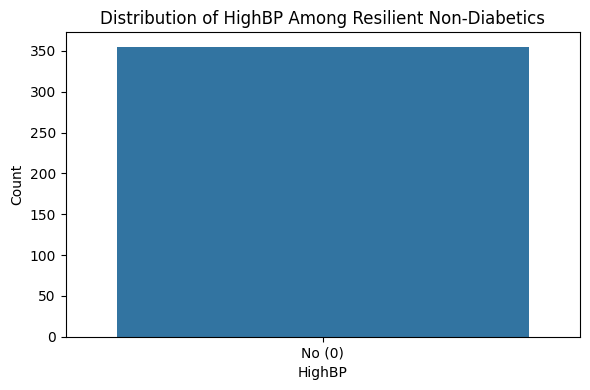

<ipython-input-122-9aa7b3e0bc18>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No (0)', 'Yes (1)'])


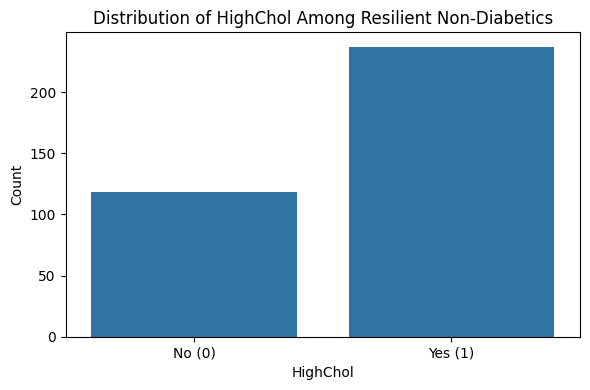

<ipython-input-122-9aa7b3e0bc18>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No (0)', 'Yes (1)'])


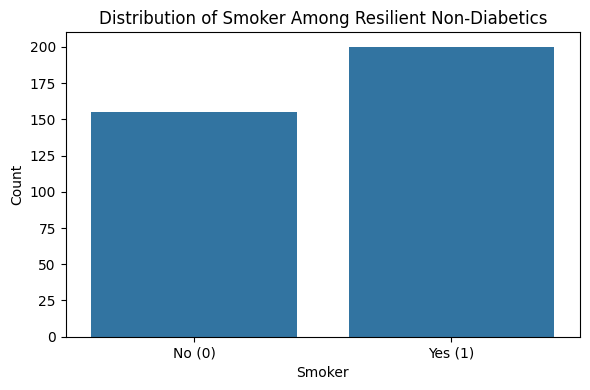

<ipython-input-122-9aa7b3e0bc18>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No (0)', 'Yes (1)'])


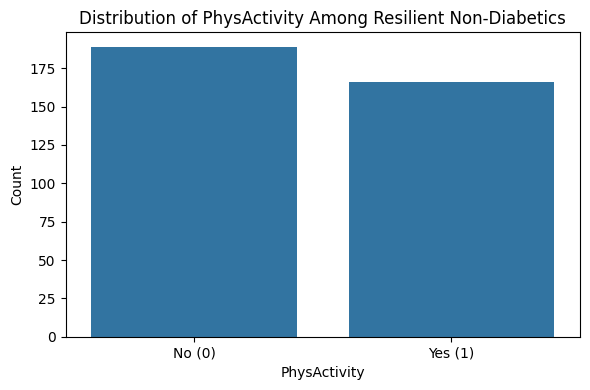

<ipython-input-122-9aa7b3e0bc18>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No (0)', 'Yes (1)'])


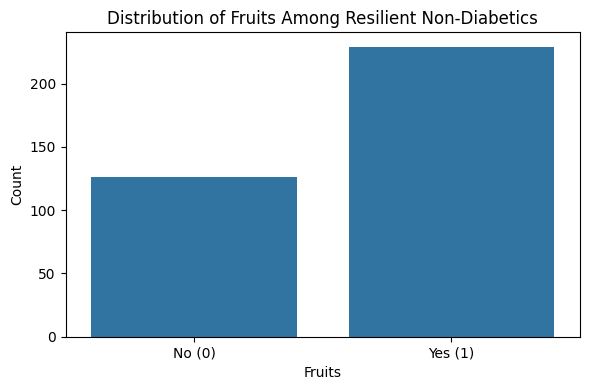

<ipython-input-122-9aa7b3e0bc18>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No (0)', 'Yes (1)'])


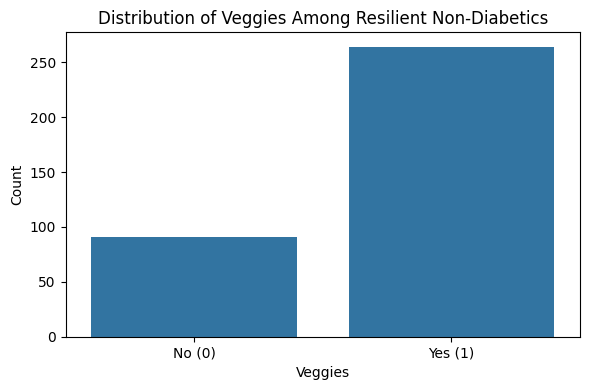

<ipython-input-122-9aa7b3e0bc18>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No (0)', 'Yes (1)'])


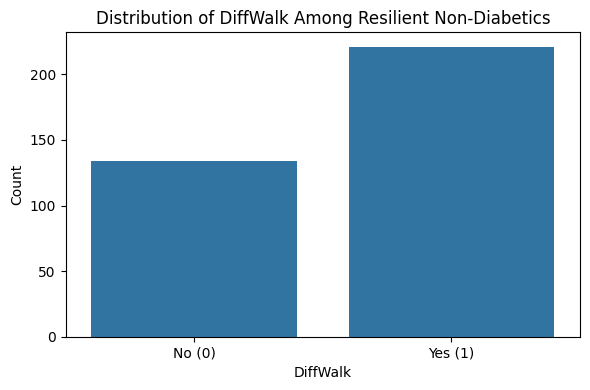

<ipython-input-122-9aa7b3e0bc18>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female (0)', 'Male (1)'])


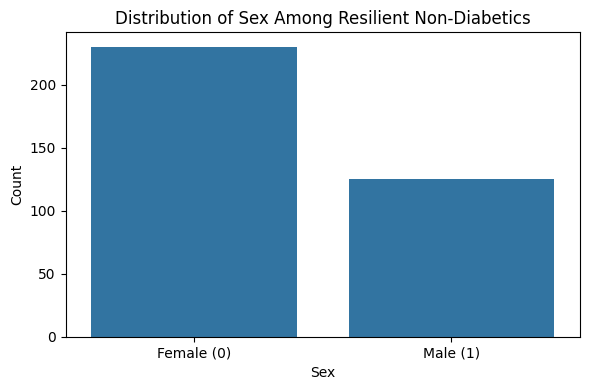

In [ ]:
for feature in binary_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=feature, data=resilient_non_diabetics)
    plt.title(f'Distribution of {feature} Among Resilient Non-Diabetics')
    plt.xlabel(feature)
    plt.ylabel('Count')

    if feature == 'Sex':
        ax.set_xticklabels(['Female (0)', 'Male (1)'])
    else:
        ax.set_xticklabels(['No (0)', 'Yes (1)'])

    plt.tight_layout()
    plt.show()

#### 3. Correlation Heatmap for Resilient Non-Diabetics

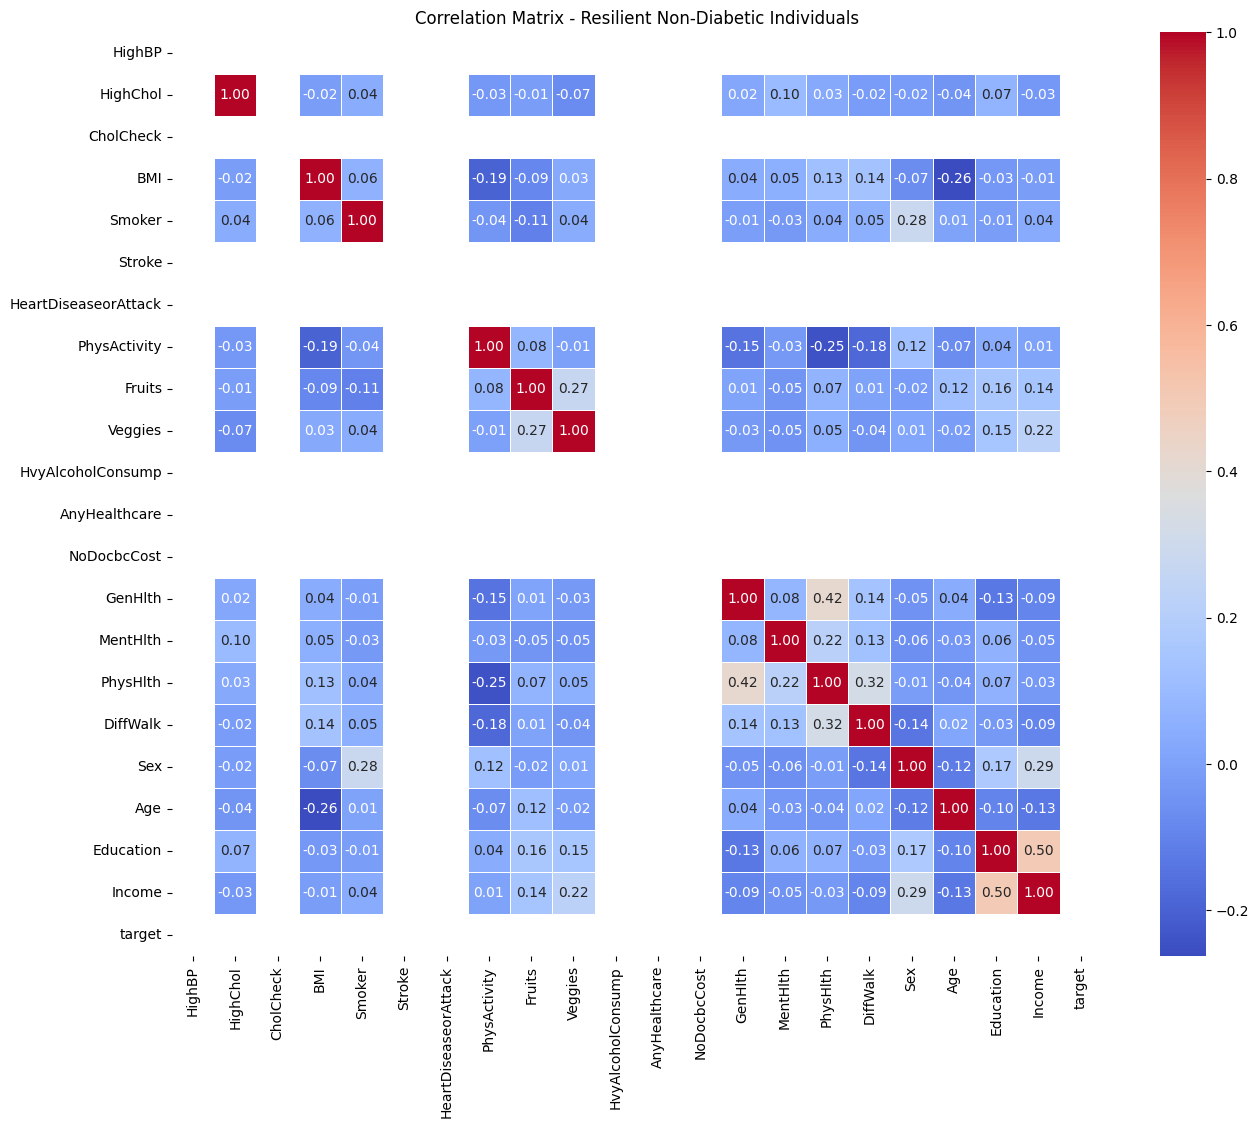

In [ ]:
plt.figure(figsize=(15, 12))
correlation_matrix_resilient = resilient_non_diabetics.corr()
# sns.heatmap(correlation_matrix_resilient, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
sns.heatmap(correlation_matrix_resilient, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Resilient Non-Diabetic Individuals')
# plt.tight_layout()
plt.show()

## Dashboard Building

## Prediction/Validation

###Random Forest Classifer (cluster)

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()


In [ ]:
#rfc.fit(X_train, y_train)

In [ ]:
df_xy.head()

HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
188612       1         1          1 -0.719024       1       0   
182739       0         0          1 -0.554864       0       0   
365892       1         1          1  2.728351       0       0   
203283       1         1          1  1.415065       1       0   
394216       1         0          1 -0.390703       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
188612                     0             0       0        0  ...            0   
182739                     0             1       1        1  ...            0   
365892                     0             0       0        1  ...            0   
203283                     0             1       1        1  ...            0   
394216                     0             1       0        0  ...            0   

         GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  Education  \
188612 -0.607313  3.147779 -0.497771         0    0  0.509304  -0.924695   
182739 -0.607313 -0.398290 -0.497771         0    0  0.867879   1.065077   
365892  0.417402 -0.398290 -0.497771         0    0  0.867879  -0.924695   
203283  0.417402  1.965756 -0.497771         0    1 -0.566421  -0.924695   
394216  0.417402 -0.398290 -0.497771         0    1  0.509304   1.065077   

          Income  target  
188612 -1.876764       0  
182739  0.522763       0  
365892 -0.916953       1  
203283  0.042857       0  
394216  1.002668       1  

[5 rows x 22 columns]

In [ ]:
cluster_labels

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
df_xy['Cluster_Labels'] = cluster_labels

In [ ]:
# Removing target column and using cluster labels as target column
df_xy.drop('target', axis = 1, inplace=True)


In [ ]:
rfc_x = df_xy.drop('Cluster_Labels', axis = 1)
rfc_y = df_xy.Cluster_Labels

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rfc_x, rfc_y, test_size = 0.2, random_state=101)


In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
model_predictions = rfc.predict(X_test)



In [ ]:
print(f"Accuracy: {accuracy_score(y_test, model_predictions)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, model_predictions)}")

Accuracy: 0.98036440827879
Confusion Matrix: [[3821  120]
 [ 102 7263]]


###RF with CV and grid search

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Instantiate the RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit on the training data
grid_search.fit(X_train, y_train)

# Best estimator and parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = best_model.predict(X_test)

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Display
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

In [ ]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


###RF Grid Search CV using Resilient Factors Only (=diabetes 0) rows and all diabetes 1 rows

In [ ]:
df_xy.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Cluster_Labels'],
      dtype='object')

In [ ]:
df_xy_diabetes1=df_xy[df_xy['Cluster_Labels']==1]
sampled_rows = df_xy_diabetes1.sample(n=355, random_state=42)
df_X_diabetes1=sampled_rows.drop('Cluster_Labels', axis=1)
df_y_diabetes1=sampled_rows.Cluster_Labels

In [ ]:
X_train_resilient = resilient_non_diabetics.drop('target', axis=1)
X_train_resilient.head()

HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
46548        1         0          1  0.101779       0       0   
15245        1         1          1  1.579226       1       0   
99099        1         1          1 -0.062381       0       0   
183608       1         0          1  1.579226       1       0   
224861       1         0          1 -0.062381       1       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
46548                      0             0       1        0  ...   
15245                      0             1       1        1  ...   
99099                      0             0       1        0  ...   
183608                     0             1       1        1  ...   
224861                     0             0       1        1  ...   

        AnyHealthcare  NoDocbcCost   GenHlth  MentHlth  PhysHlth  DiffWalk  \
46548               1            0  1.442118 -0.398290 -0.497771         0   
15245               1            0  2.466834  4.329802  2.932304         1   
99099               1            0  1.442118 -0.398290 -0.497771         1   
183608              1            0  1.442118 -0.398290  1.217266         0   
224861              1            0  1.442118 -0.398290 -0.497771         1   

        Sex       Age  Education    Income  
46548     0  1.585029   0.070191  0.522763  
15245     0  0.867879   0.070191 -1.876764  
99099     1  0.867879   1.065077  1.002668  
183608    0  1.585029   0.070191  0.042857  
224861    1  1.585029  -0.924695  0.522763  

[5 rows x 21 columns]

In [ ]:
y_train_resilient = resilient_non_diabetics.target
y_train_resilient.head()


46548     0
15245     0
99099     0
183608    0
224861    0
Name: target, dtype: int64

In [ ]:
y_train_resilient.unique()

array([0])

In [ ]:
type(X_train_resilient)


pandas.core.frame.DataFrame

In [ ]:
type(y_train_resilient)

pandas.core.series.Series

In [ ]:
X_train_resilient.shape

(355, 21)

In [ ]:
y_train_resilient.shape

(355,)

In [ ]:
# df_xy_diabetes1=df_xy[df_xy['target']==1]
# df_X_diabetes1=df_xy_diabetes1.drop('target', axis=1)
# df_y_diabetes1=df_xy_diabetes1.target
# X_train_resilient

In [ ]:
# X_train_final=df_X_diabetes1.append(X_train_resilient)
# sampled_rows = df_X_diabetes1.sample(n=355, random_state=42)
X_train_final = pd.concat([df_X_diabetes1, X_train_resilient], ignore_index=True)

In [ ]:
# y_train_final=df_y_diabetes1.append(y_train_resilient)
y_train_final = pd.concat([df_y_diabetes1, y_train_resilient], ignore_index=True)

In [ ]:
XY_train_final=pd.concat([X_train_final, y_train_final], axis=1)

In [ ]:
XY_train_final.shape

(710, 22)

In [ ]:
XY_train_final.columns

Index([              'HighBP',             'HighChol',            'CholCheck',
                        'BMI',               'Smoker',               'Stroke',
       'HeartDiseaseorAttack',         'PhysActivity',               'Fruits',
                    'Veggies',    'HvyAlcoholConsump',        'AnyHealthcare',
                'NoDocbcCost',              'GenHlth',             'MentHlth',
                   'PhysHlth',             'DiffWalk',                  'Sex',
                        'Age',            'Education',               'Income',
                            0],
      dtype='object')

In [ ]:
XY_train_final.head()

HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0       0         0          1 -0.554864       0       0   
1       1         0          1 -0.719024       1       0   
2       0         0          1  1.415065       0       0   
3       1         1          1  0.265940       1       0   
4       0         0          1 -1.047346       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                     0             1       1        1  ...            0   
1                     0             0       1        1  ...            0   
2                     0             0       1        0  ...            0   
3                     0             1       0        1  ...            0   
4                     0             1       0        0  ...            0   

    GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  Education    Income  \
0 -0.607313  -0.39829 -0.497771         0    1  0.509304   1.065077  1.002668   
1 -0.607313  -0.39829 -0.497771         0    0  1.226454   0.070191  0.522763   
2 -0.607313  -0.39829 -0.497771         0    1  0.150729  -0.924695  0.042857   
3 -0.607313  -0.39829 -0.497771         0    1  0.509304   0.070191  1.002668   
4 -1.632029  -0.39829 -0.154764         0    0 -2.359296   1.065077 -2.356670   

   0  
0  1  
1  1  
2  1  
3  1  
4  1  

[5 rows x 22 columns]

In [ ]:
XY_train_final.rename(columns={XY_train_final.columns[-1]: 'Cluster_Labels'}, inplace=True)


In [ ]:
XY_train_final.head()

HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0       0         0          1 -0.554864       0       0   
1       1         0          1 -0.719024       1       0   
2       0         0          1  1.415065       0       0   
3       1         1          1  0.265940       1       0   
4       0         0          1 -1.047346       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                     0             1       1        1  ...            0   
1                     0             0       1        1  ...            0   
2                     0             0       1        0  ...            0   
3                     0             1       0        1  ...            0   
4                     0             1       0        0  ...            0   

    GenHlth  MentHlth  PhysHlth  DiffWalk  Sex       Age  Education    Income  \
0 -0.607313  -0.39829 -0.497771         0    1  0.509304   1.065077  1.002668   
1 -0.607313  -0.39829 -0.497771         0    0  1.226454   0.070191  0.522763   
2 -0.607313  -0.39829 -0.497771         0    1  0.150729  -0.924695  0.042857   
3 -0.607313  -0.39829 -0.497771         0    1  0.509304   0.070191  1.002668   
4 -1.632029  -0.39829 -0.154764         0    0 -2.359296   1.065077 -2.356670   

   Cluster_Labels  
0               1  
1               1  
2               1  
3               1  
4               1  

[5 rows x 22 columns]

In [ ]:
class_distribution = XY_train_final['Cluster_Labels'].value_counts(normalize=True)
print(f"Class distribution before sampling:\n{class_distribution}")

Class distribution before sampling:
Cluster_Labels
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
# import pandas as pd

# # Total number of rows to sample
# n_samples = 100000

# # Count the number of samples per class
# class_counts = XY_train_final['Cluster_Labels'].value_counts()

# # Total available rows
# total_rows = len(XY_train_final)

# # If we have fewer than 100,000 rows, sample all
# if total_rows <= n_samples:
#     XY_train_final_smote_sampled = XY_train_final.sample(frac=1.0, random_state=42)
# else:
#     # Calculate sample size per class proportionally
#     class_ratios = class_counts / total_rows
#     sample_counts = (class_ratios * n_samples).round().astype(int)

#     # Sample each class accordingly
#     sampled_dfs = []
#     for cls, count in sample_counts.items():
#         cls_df = XY_train_final[XY_train_final['Cluster_Labels'] == cls]
#         sampled_cls_df = cls_df.sample(n=min(count, len(cls_df)), random_state=42)
#         sampled_dfs.append(sampled_cls_df)

#     # Concatenate all class-wise samples
#     XY_train_final_smote_sampled = pd.concat(sampled_dfs).sample(frac=1.0, random_state=42)  # Shuffle final result


In [ ]:
# # Sample 100,000 rows while maintaining the class balance
# # XY_train_final_smote_sampled = XY_train_final.groupby('Cluster_Labels', group_keys=False).apply(lambda x: x.sample(frac=1.0, random_state=42)).sample(n=100000, random_state=42)
# XY_train_final_smote_sampled = XY_train_final.groupby('Cluster_Labels', group_keys=False).apply(lambda x: x.sample(frac=0.25, random_state=42))

<ipython-input-161-b11784351088>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  XY_train_final_smote_sampled = XY_train_final.groupby('Cluster_Labels', group_keys=False).apply(lambda x: x.sample(frac=0.25, random_state=42))


In [ ]:
# # Check the class distribution of the sampled data
# sampled_class_distribution = XY_train_final_smote_sampled['Cluster_Labels'].value_counts(normalize=True)
# print(f"Class distribution after sampling 100,000 rows:\n{sampled_class_distribution}")

Class distribution after sampling 100,000 rows:
Cluster_Labels
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# import pandas as pd

# def stratified_sample(df, label_col, n_samples, random_state=42):
#     """
#     Stratified sampling from a DataFrame.

#     Parameters:
#     - df: pandas DataFrame
#     - label_col: column name to stratify by
#     - n_samples: total number of rows to sample
#     - random_state: seed for reproducibility

#     Returns:
#     - Stratified sampled DataFrame
#     """
#     total_rows = len(df)

#     # If dataset is smaller than the desired sample, return all rows
#     if total_rows <= n_samples:
#         return df.sample(frac=1.0, random_state=random_state)

#     # Compute class proportions
#     proportions = df[label_col].value_counts(normalize=True)

#     # Calculate sample count per class
#     sample_counts = (proportions * n_samples).round().astype(int)

#     # Perform class-wise sampling
#     sampled_dfs = []
#     for label, count in sample_counts.items():
#         group_df = df[df[label_col] == label]
#         sample_size = min(count, len(group_df))
#         sampled = group_df.sample(n=sample_size, random_state=random_state)
#         sampled_dfs.append(sampled)

#     # Combine and shuffle
#     final_sample = pd.concat(sampled_dfs).sample(frac=1.0, random_state=random_state)

#     return final_sample


In [ ]:
# X_train_final_smote_sampled=XY_train_final_smote_sampled.drop('Cluster_Labels',axis=1)

In [ ]:
# y_train_final_smote_sampled=XY_train_final_smote_sampled.Cluster_Labels

In [ ]:
# XY_train_final_smote_sampled = stratified_sample(XY_train_final, label_col='Cluster_Labels', n_samples=100000)


# # Check the resulting class distribution
# print(XY_train_final_smote_sampled['Cluster_Labels'].value_counts(normalize=True))


In [ ]:
# import pandas as pd

# def stratified_sample(df, label_cols, n_samples, random_state=42):
#     """
#     Stratified sampling from a DataFrame using one or more label columns.

#     Parameters:
#     - df: pandas DataFrame
#     - label_cols: column name or list of columns to stratify by
#     - n_samples: total number of rows to sample
#     - random_state: seed for reproducibility

#     Returns:
#     - Stratified sampled DataFrame
#     """
#     # Convert to list if only one column is provided
#     if isinstance(label_cols, str):
#         label_cols = [label_cols]

#     total_rows = len(df)

#     # If dataset is smaller than the desired sample, return all rows
#     if total_rows <= n_samples:
#         return df.sample(frac=1.0, random_state=random_state)

#     # Create a stratum identifier for each row
#     df = df.copy()
#     df['_stratum'] = df[label_cols].astype(str).agg('_'.join, axis=1)

#     # Calculate stratum proportions
#     stratum_counts = df['_stratum'].value_counts(normalize=True)
#     stratum_sample_counts = (stratum_counts * n_samples).round().astype(int)

#     # Sample from each stratum
#     sampled_dfs = []
#     for stratum, count in stratum_sample_counts.items():
#         stratum_df = df[df['_stratum'] == stratum]
#         sample_size = min(count, len(stratum_df))
#         sampled = stratum_df.sample(n=sample_size, random_state=random_state)
#         sampled_dfs.append(sampled)

#     # Combine and shuffle final result
#     final_sample = pd.concat(sampled_dfs).drop(columns=['_stratum'])
#     final_sample = final_sample.sample(frac=1.0, random_state=random_state)

#     return final_sample


In [ ]:
# XY_train_final_smote_sampled = stratified_sample(XY_train_final, label_cols='Cluster_Labels', n_samples=100000)

In [ ]:
# print(XY_train_final_smote_sampled.groupby(['Cluster_Labels']).size() / len(XY_train_final_smote_sampled))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Test Accuracy: 0.742172297894923

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.27      0.42      3941
           1       0.72      0.99      0.83      7365

    accuracy                           0.74     11306
   macro avg       0.84      0.63      0.63     11306
weighted avg       0.80      0.74      0.69     11306



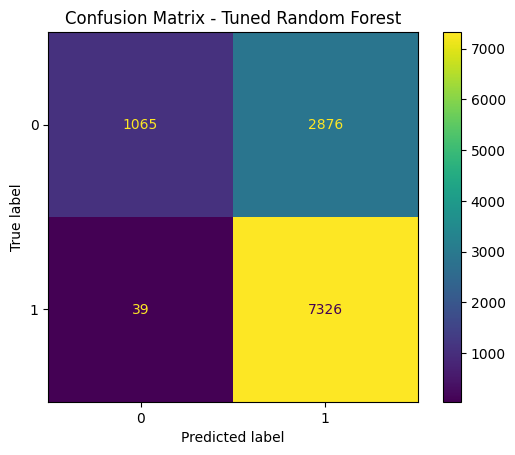

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Instantiate the RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit on the training data
grid_search.fit(X_train_final, y_train_final)

# Best estimator and parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = best_model.predict(X_test)

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Display
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


In [ ]:
cv_scores = cross_val_score(best_model, X_train_final, y_train_final, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


Cross-validation scores: [0.99295775 0.99295775 1.         1.         1.        ]
Mean CV Accuracy: 0.9972


###RF Final with only few features

In [ ]:
selected_features = ['Veggies', 'PhysActivity', 'DiffWalk']
X_train_selected = X_train_final[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
X_train_selected.shape


(710, 3)

In [ ]:
X_train_selected.head()

Veggies  PhysActivity  DiffWalk
0        1             1         0
1        1             0         0
2        0             0         0
3        1             1         0
4        0             1         0

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Test Accuracy: 0.7286396603573324

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.53      0.58      3941
           1       0.77      0.83      0.80      7365

    accuracy                           0.73     11306
   macro avg       0.70      0.68      0.69     11306
weighted avg       0.72      0.73      0.72     11306



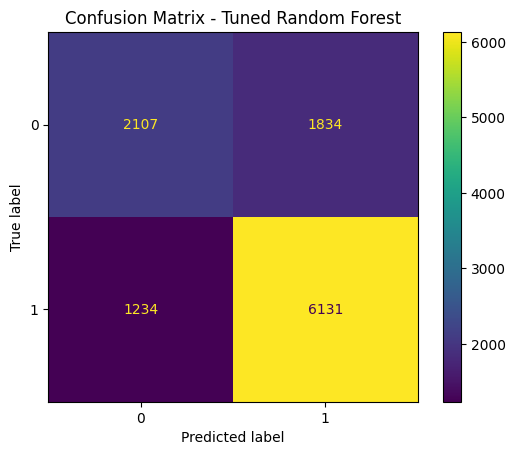

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Instantiate the RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit on the training data
grid_search.fit(X_train_selected, y_train_final)

# Best estimator and parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = best_model.predict(X_test_selected)

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Display
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(best_model, X_test_selected, y_test)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


In [ ]:
cv_scores = cross_val_score(best_model, X_train_selected, y_train_final, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


Cross-validation scores: [0.81690141 0.76760563 0.81690141 0.8028169  0.73943662]
Mean CV Accuracy: 0.7887


## Final Report